<a href="https://colab.research.google.com/github/Safuwan1/Safuwan1/blob/main/Network_intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
dfPhase = pd.read_csv('/content/Phase1.csv')
dfPhase.head(10)

Unnamed: 0  duration protocol_type   service flag  src_bytes  dst_bytes  \
0           0         0           tcp  ftp_data   SF        491          0   
1           1         0           udp     other   SF        146          0   
2           3         0           tcp      http   SF        232       8153   
3           4         0           tcp      http   SF        199        420   
4          12         0           tcp      http   SF        287       2251   
5          16         0           tcp      http   SF        300      13788   
6          18         0           tcp      http   SF        233        616   
7          19         0           tcp      http   SF        343       1178   
8          22         0           tcp      http   SF        253      11905   
9          23      5607           udp     other   SF        147        105   

   land  wrong_fragment  urgent  ...  dst_host_srv_count  \
0     0               0       0  ...                  25   
1     0               0       0  ...                   1   
2     0               0       0  ...                 255   
3     0               0       0  ...                 255   
4     0               0       0  ...                 219   
5     0               0       0  ...                 255   
6     0               0       0  ...                 255   
7     0               0       0  ...                 255   
8     0               0       0  ...                 255   
9     0               0       0  ...                   1   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    1.00                    0.00   
3                    1.00                    0.00   
4                    1.00                    0.00   
5                    1.00                    0.00   
6                    1.00                    0.00   
7                    1.00                    0.00   
8                    1.00                    0.00   
9                    0.00                    0.85   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.12                         0.03   
5                         0.01                         0.02   
6                         0.02                         0.03   
7                         0.01                         0.04   
8                         0.01                         0.02   
9                         1.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  0.03                      0.01                  0.00   
3                  0.00                      0.00                  0.00   
4                  0.00                      0.00                  0.00   
5                  0.00                      0.00                  0.00   
6                  0.00                      0.00                  0.02   
7                  0.00                      0.00                  0.00   
8                  0.00                      0.00                  0.00   
9                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate   class  
0                      0.00  normal  
1                      0.00  normal  
2                      0.01  normal  
3                      0.00  normal  
4                      0.00  normal  
5                      0.00  normal  
6                      0.00  normal  
7                      0.00  normal  
8                      0.00  normal  

In [ ]:
dfPhase.describe(include='all')

Unnamed: 0      duration protocol_type service   flag     src_bytes  \
count   13599.000000  13599.000000         13599   13599  13599  1.359900e+04   
unique           NaN           NaN             3      51     10           NaN   
top              NaN           NaN           tcp    http     SF           NaN   
freq             NaN           NaN         10807    7566  12693           NaN   
mean    12495.645636    182.747776           NaN     NaN    NaN  1.164666e+04   
std      7333.313621   1371.063164           NaN     NaN    NaN  1.723699e+05   
min         0.000000      0.000000           NaN     NaN    NaN  0.000000e+00   
25%      6113.500000      0.000000           NaN     NaN    NaN  1.050000e+02   
50%     12521.000000      0.000000           NaN     NaN    NaN  2.320000e+02   
75%     18848.000000      0.000000           NaN     NaN    NaN  3.240000e+02   
max     25186.000000  36613.000000           NaN     NaN    NaN  7.665876e+06   

           dst_bytes          land  wrong_fragment   urgent  ...  \
count   1.359900e+04  13599.000000    13599.000000  13599.0  ...   
unique           NaN           NaN             NaN      NaN  ...   
top              NaN           NaN             NaN      NaN  ...   
freq             NaN           NaN             NaN      NaN  ...   
mean    4.352227e+03      0.000074        0.001177      0.0  ...   
std     6.941981e+04      0.008575        0.058150      0.0  ...   
min     0.000000e+00      0.000000        0.000000      0.0  ...   
25%     8.100000e+01      0.000000        0.000000      0.0  ...   
50%     3.700000e+02      0.000000        0.000000      0.0  ...   
75%     2.009000e+03      0.000000        0.000000      0.0  ...   
max     5.131424e+06      1.000000        3.000000      0.0  ...   

        dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count         13599.000000            13599.000000            13599.000000   
unique                 NaN                     NaN                     NaN   
top                    NaN                     NaN                     NaN   
freq                   NaN                     NaN                     NaN   
mean            187.626664                0.803486                0.041635   
std              94.248057                0.331422                0.130418   
min               0.000000                0.000000                0.000000   
25%             110.000000                0.720000                0.000000   
50%             255.000000                1.000000                0.000000   
75%             255.000000                1.000000                0.020000   
max             255.000000                1.000000                1.000000   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                  13599.000000                 13599.000000   
unique                          NaN                          NaN   
top                             NaN                          NaN   
freq                            NaN                          NaN   
mean                       0.121749                     0.025695   
std                        0.255221                     0.068712   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.010000                     0.000000   
75%                        0.080000                     0.030000   
max                        1.000000                     1.000000   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count           13599.000000              13599.000000          13599.000000   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean                0.021073                  0.013594            

In [ ]:
dfPhase['class'].value_counts()

class
normal     13449
anomaly      150
Name: count, dtype: int64

In [ ]:
print(dfPhase.shape)
dfPhase.drop_duplicates(subset=dfPhase.columns[1:],inplace=True)
print(dfPhase.shape)

(13599, 43)
(13599, 43)


Accuracy: 0.9988970588235294


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


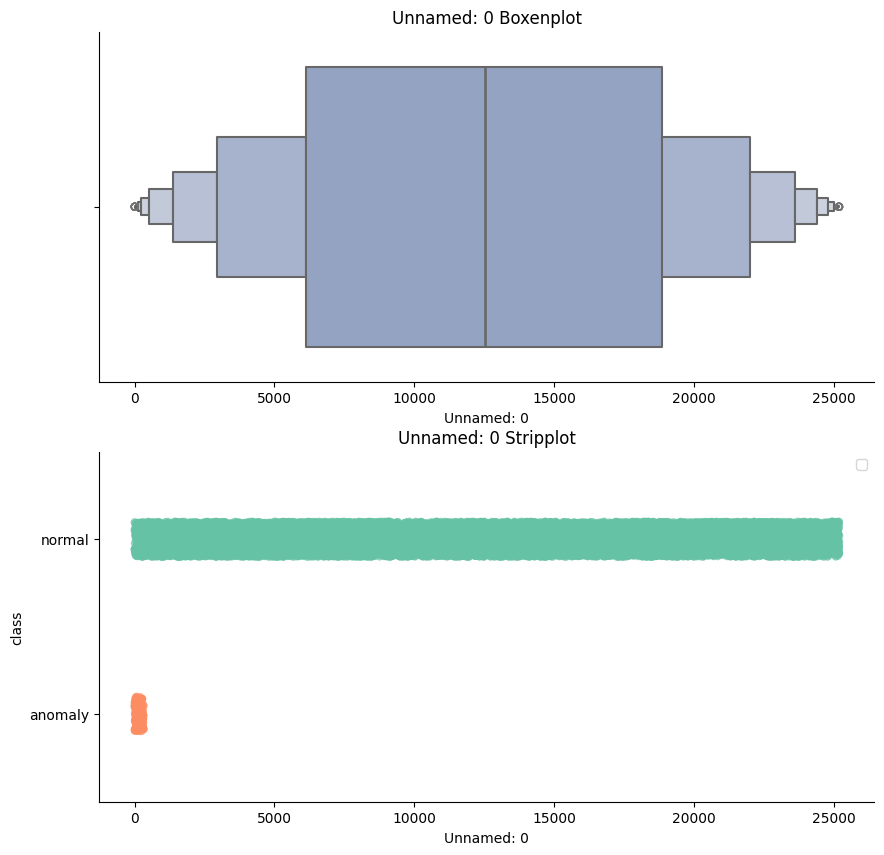

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


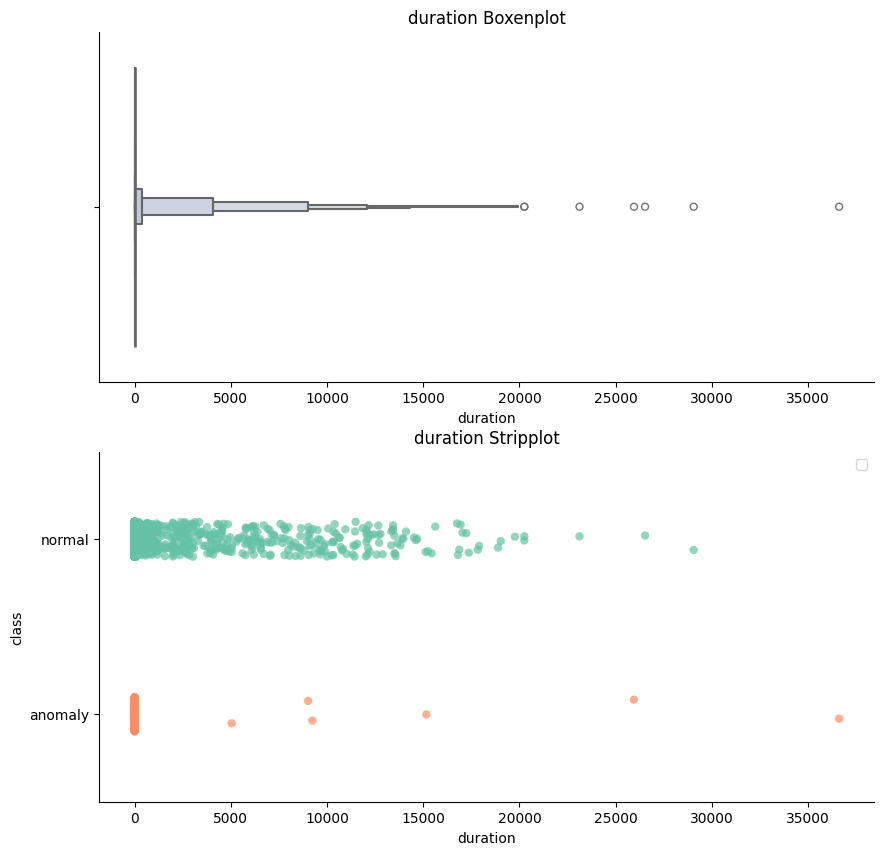

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


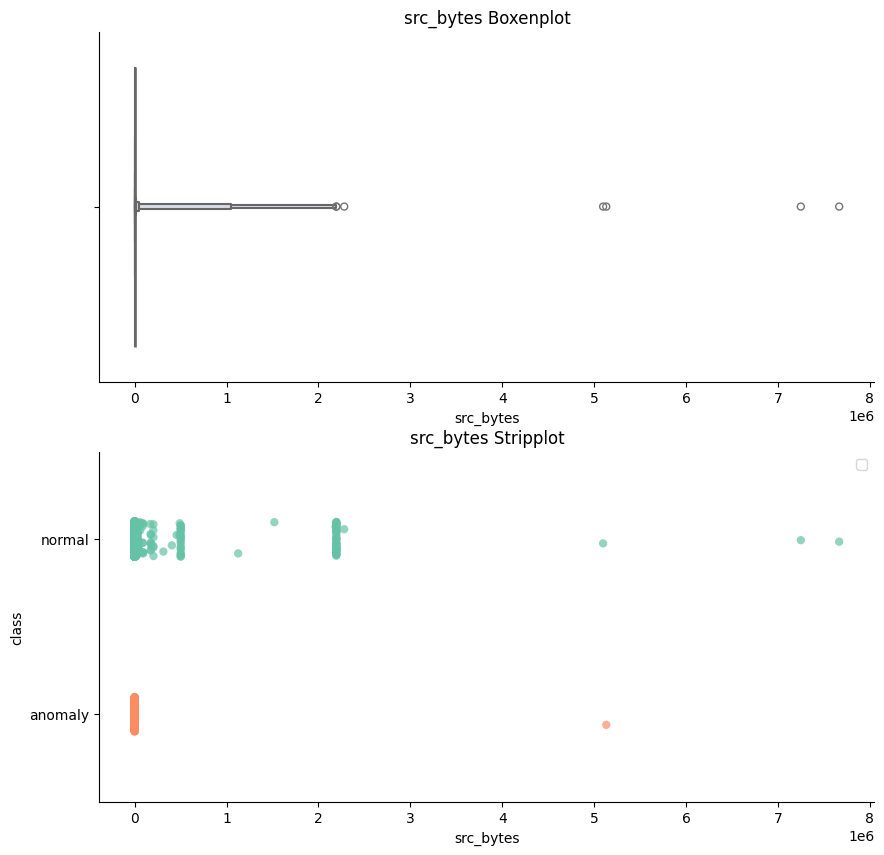

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


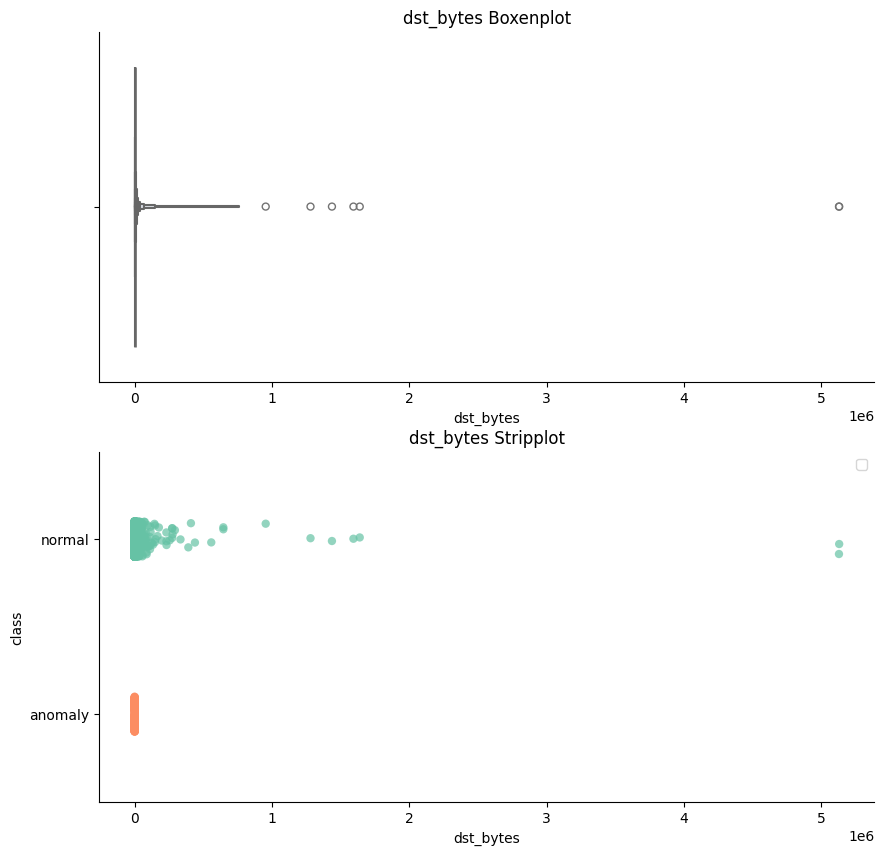

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


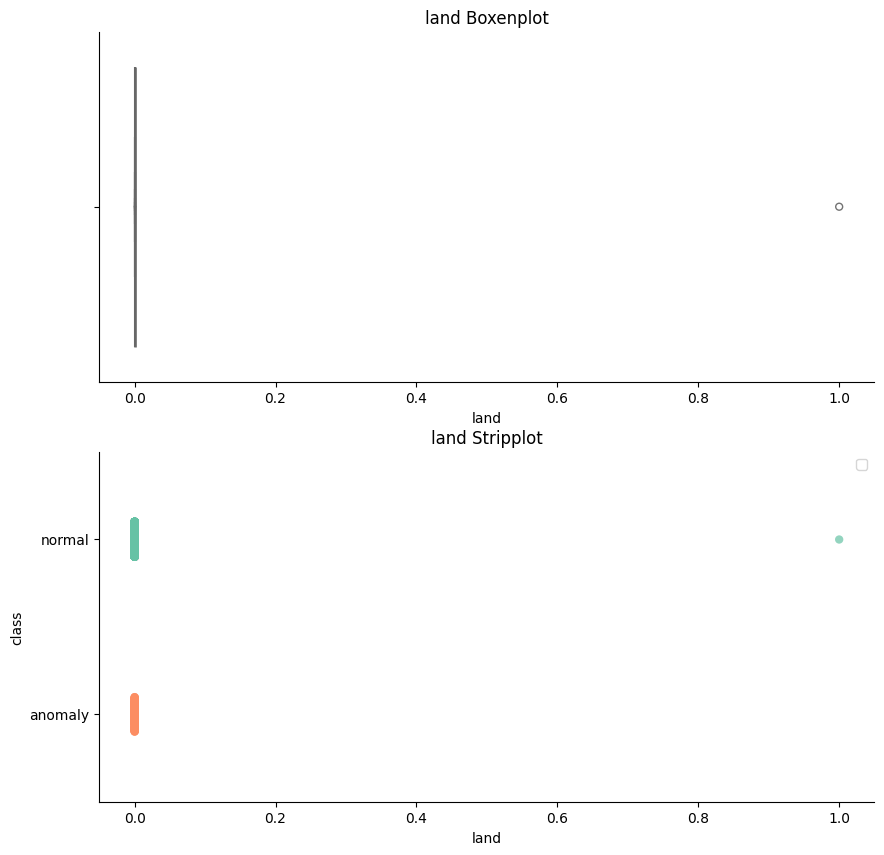

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


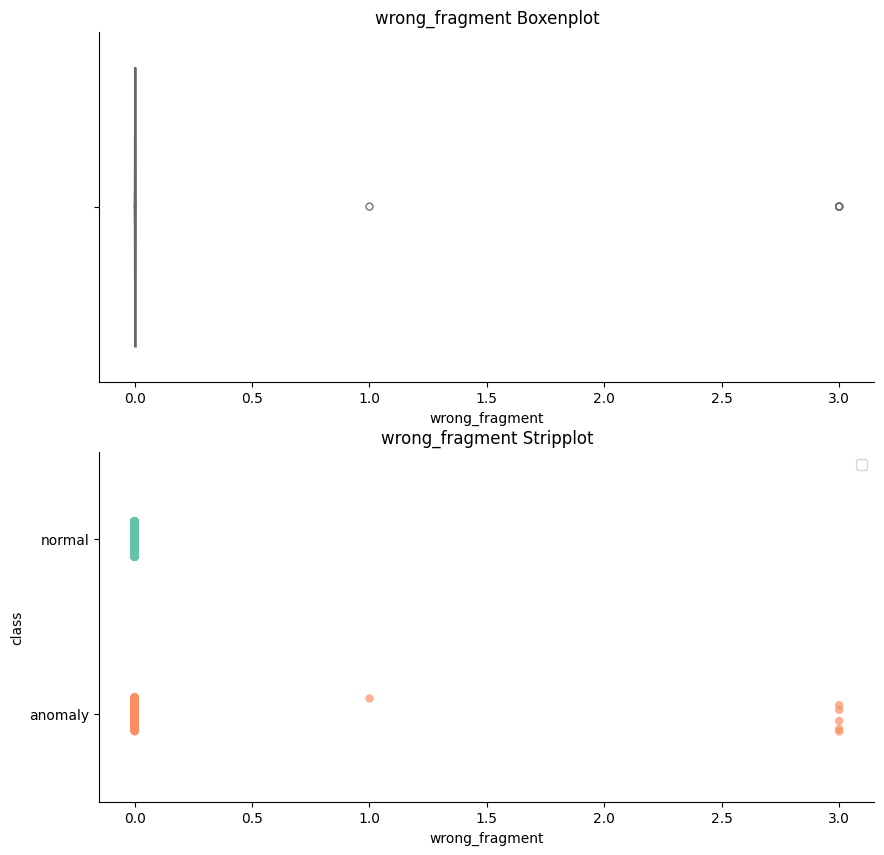

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


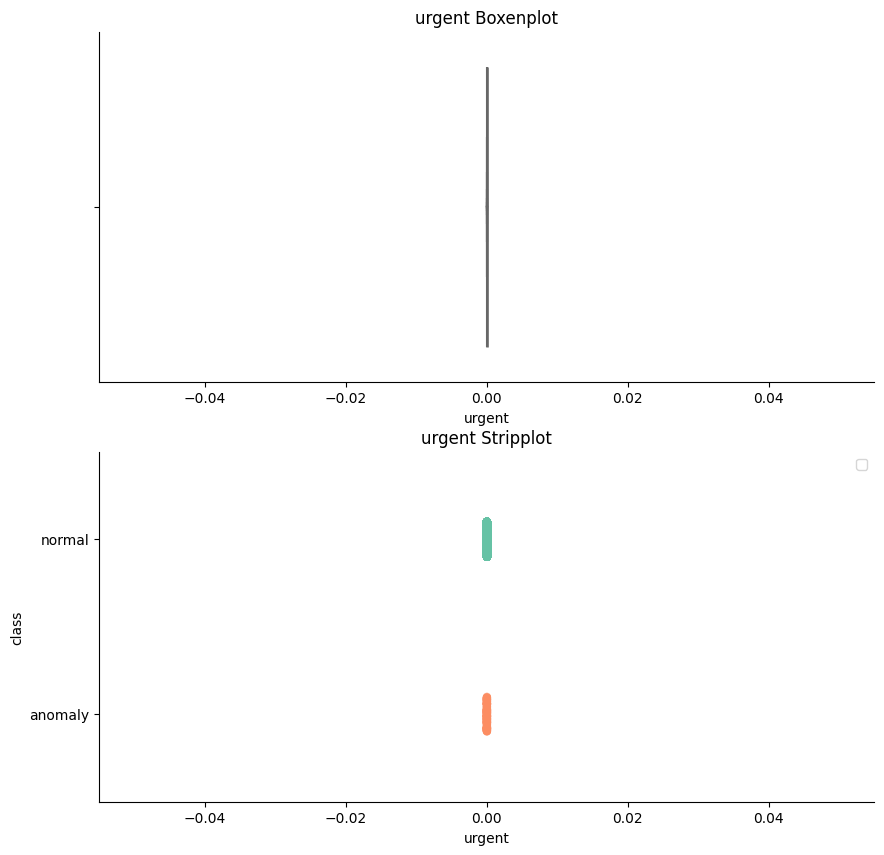

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


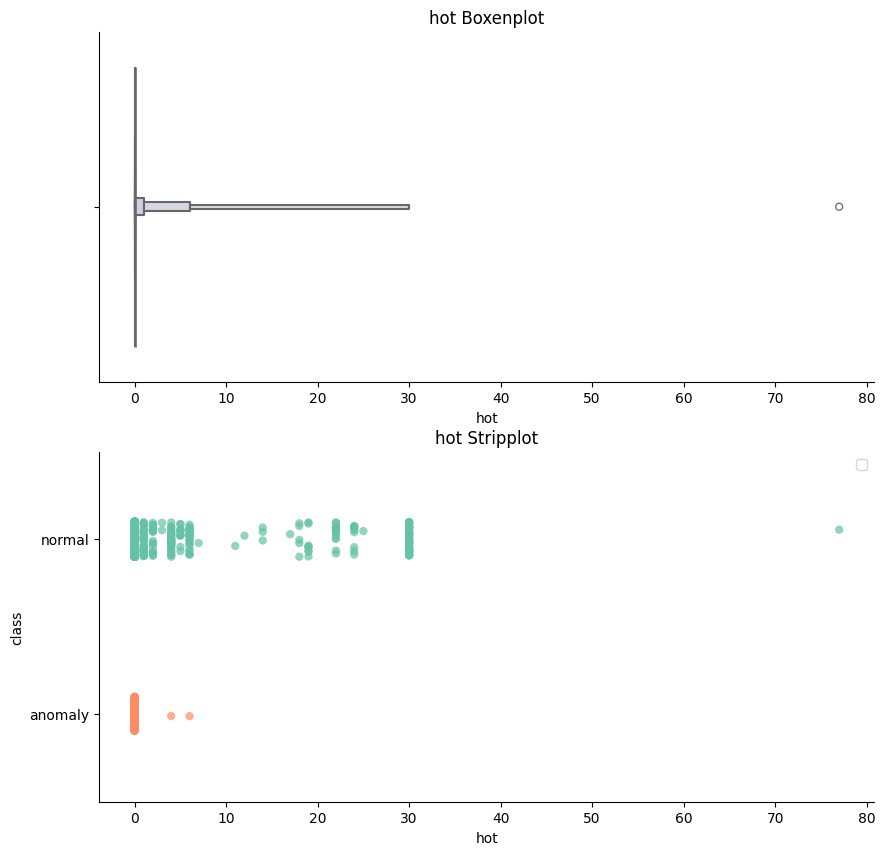

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


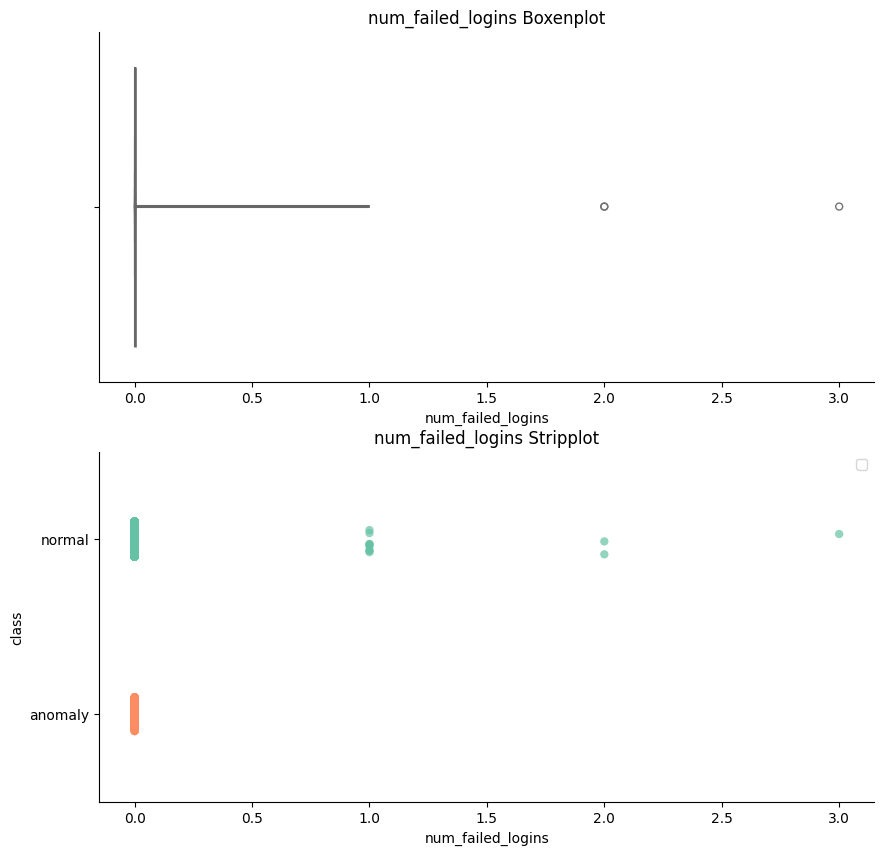

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


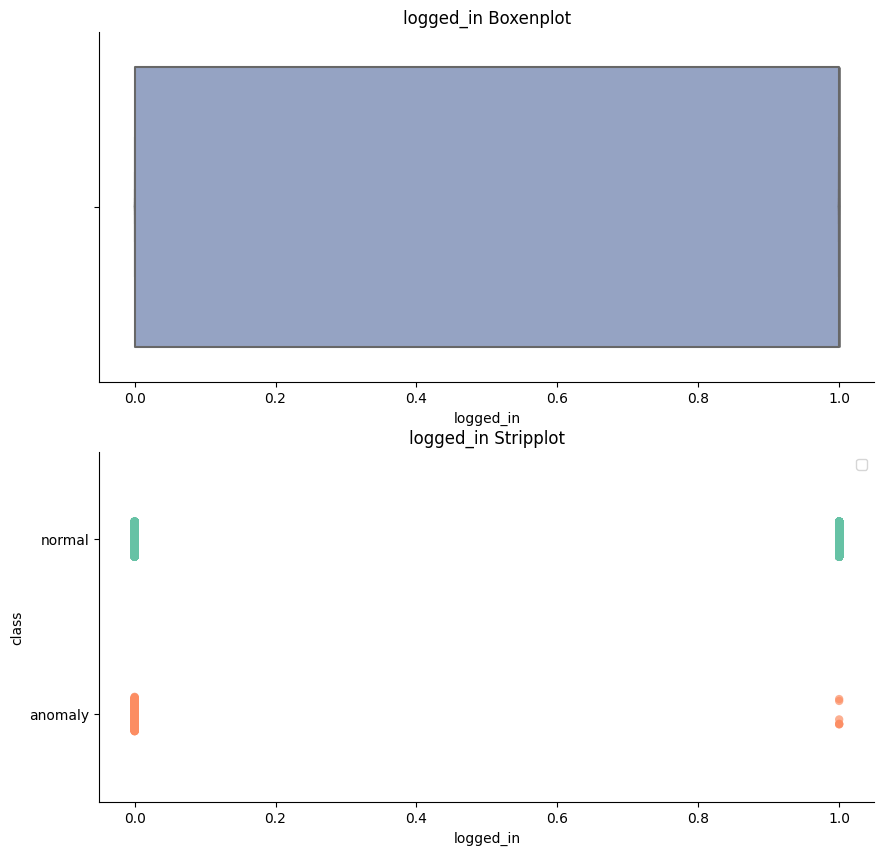

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


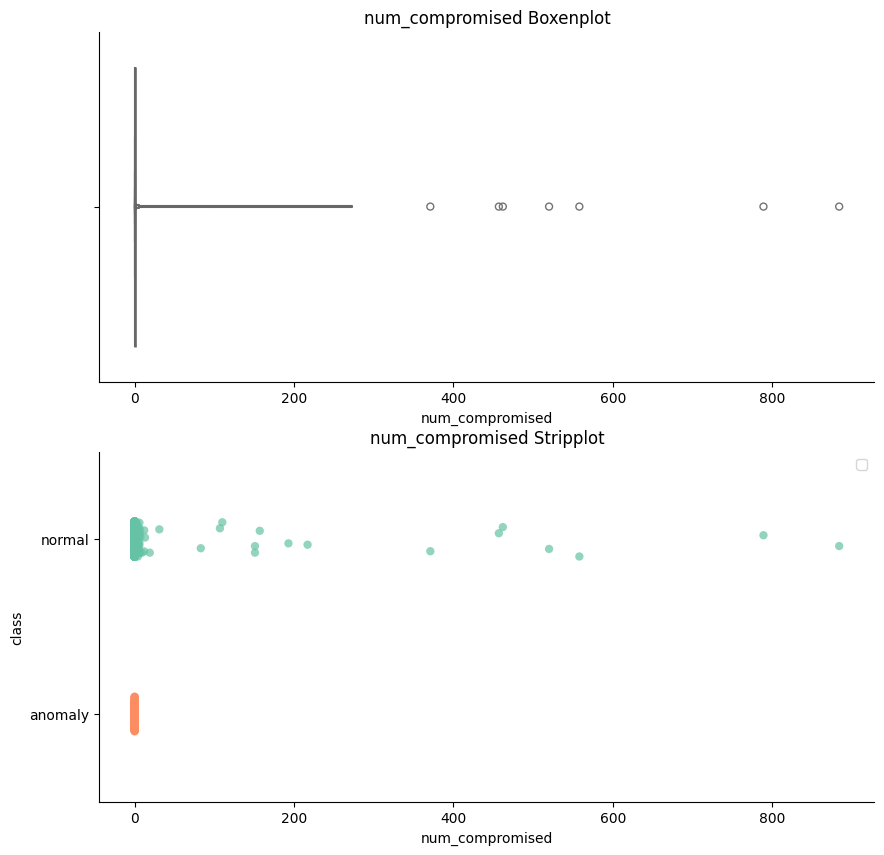

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


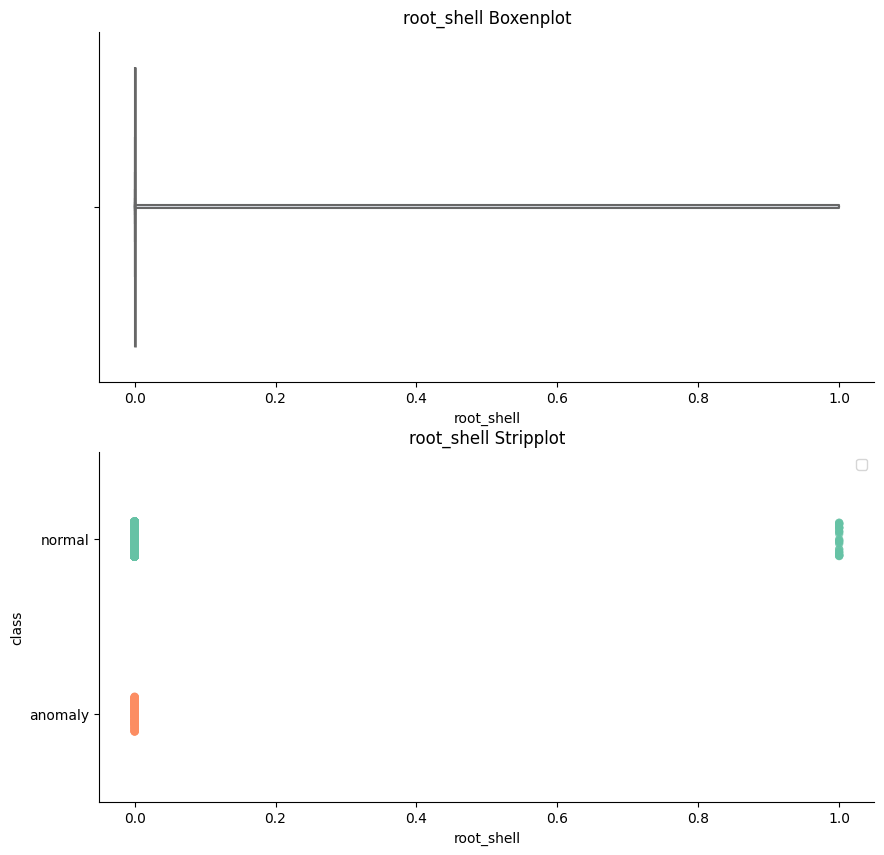

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


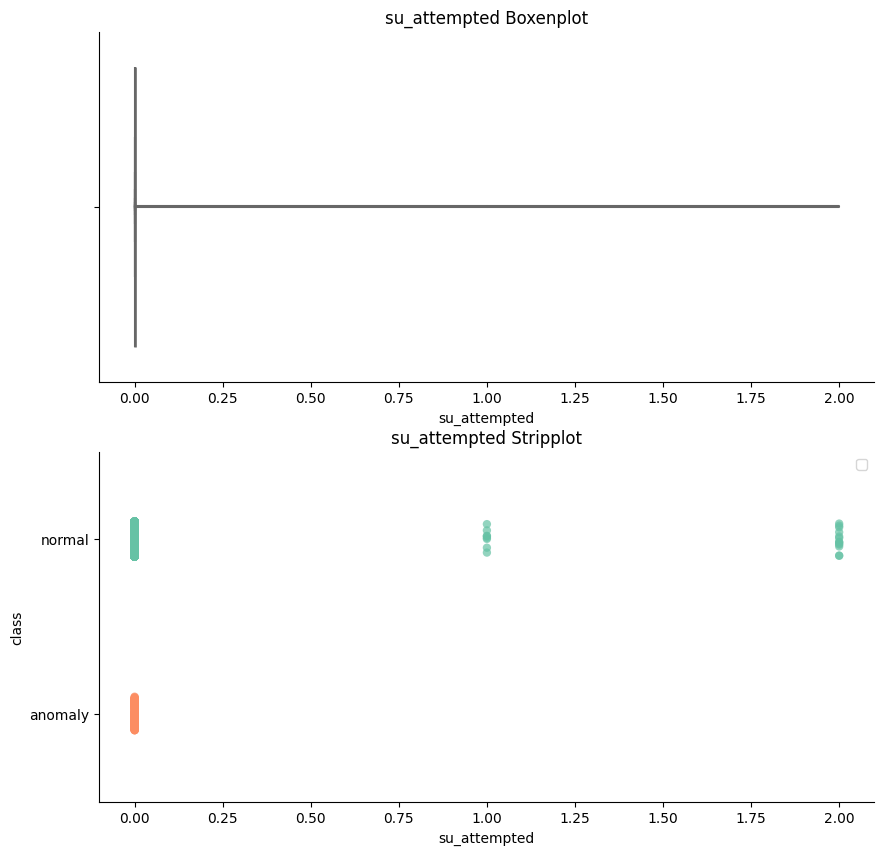

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


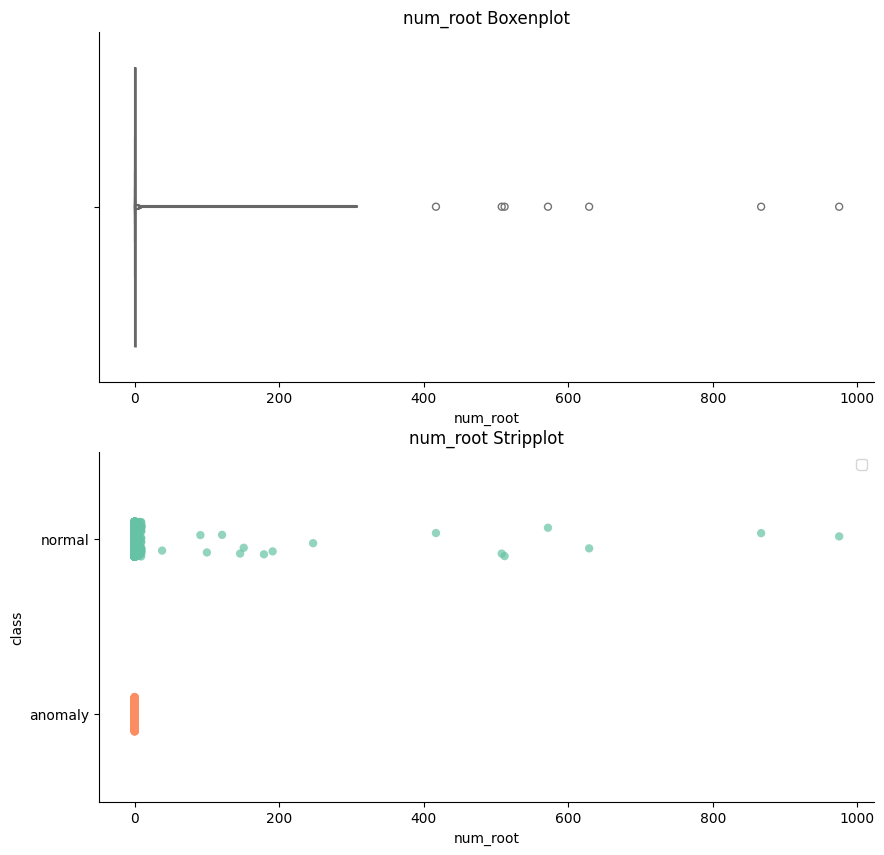

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


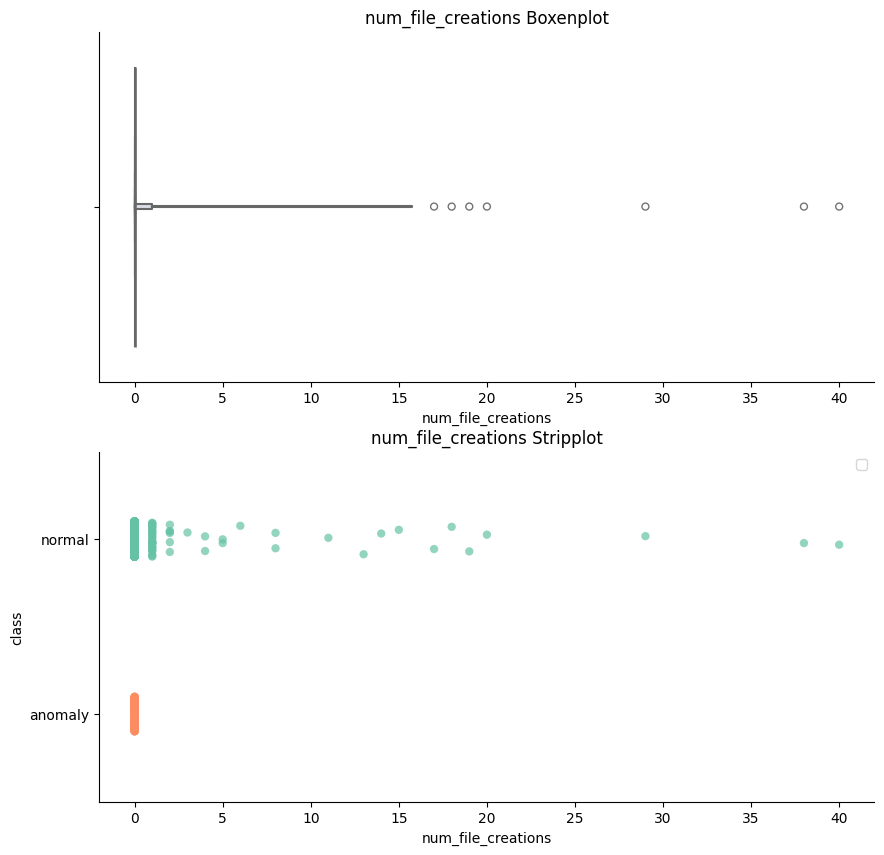

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


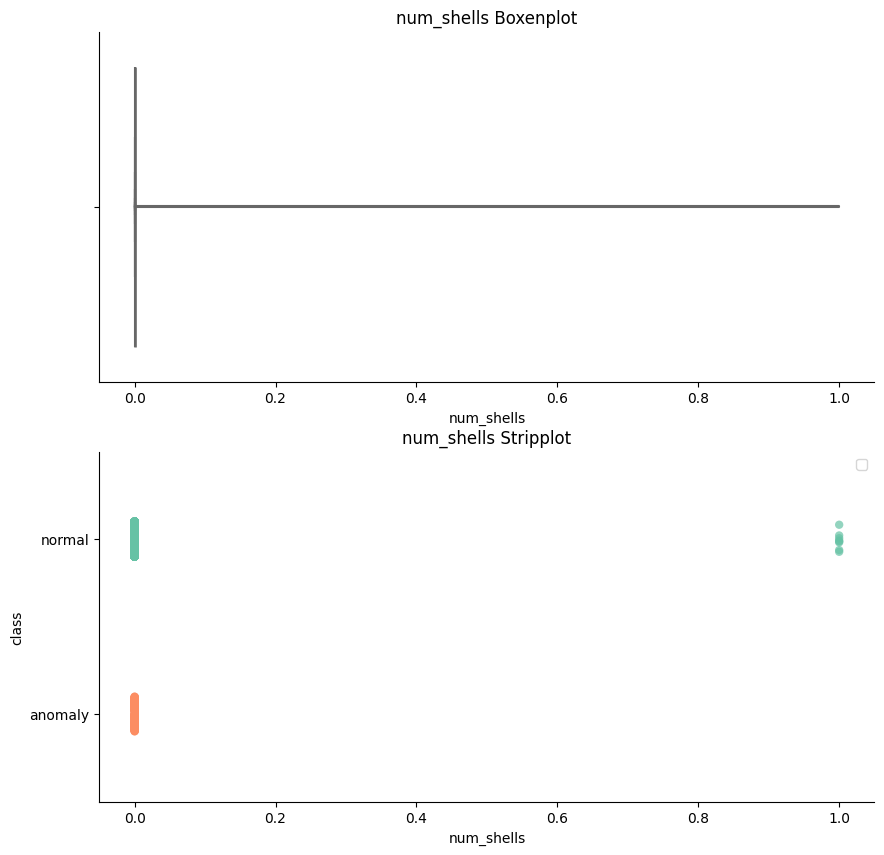

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


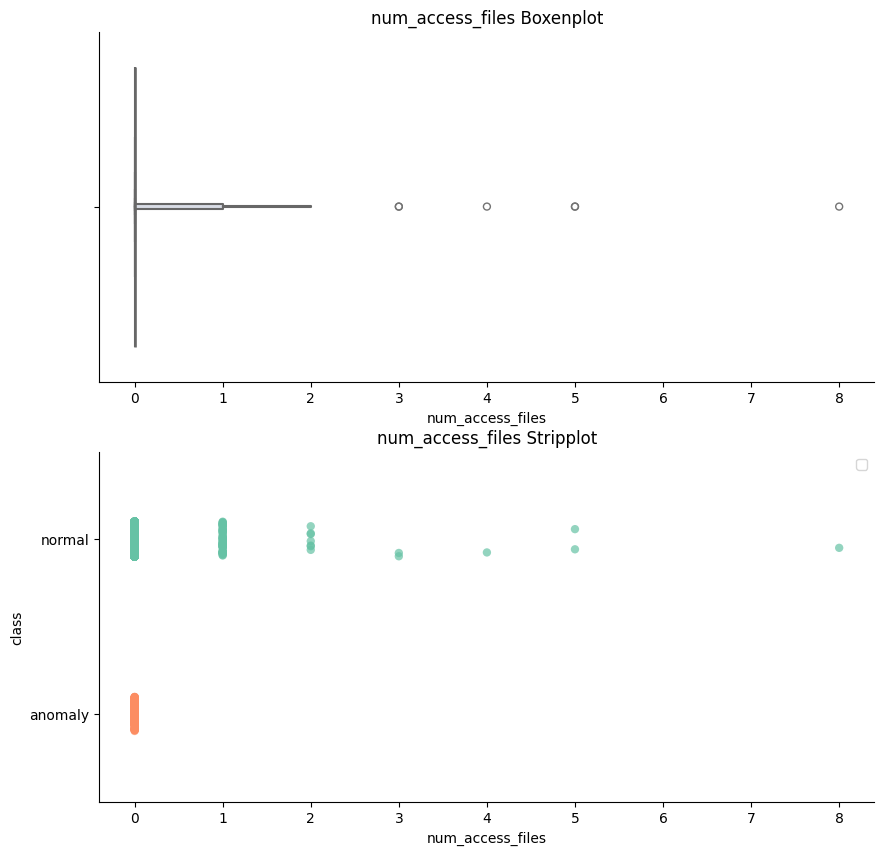

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


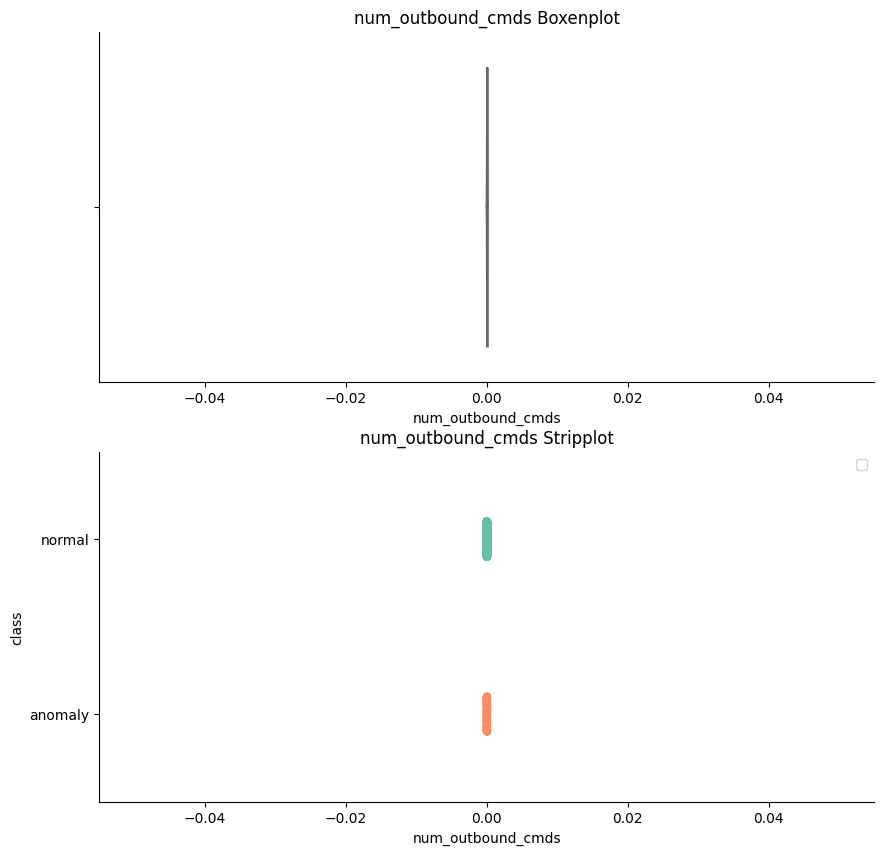

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


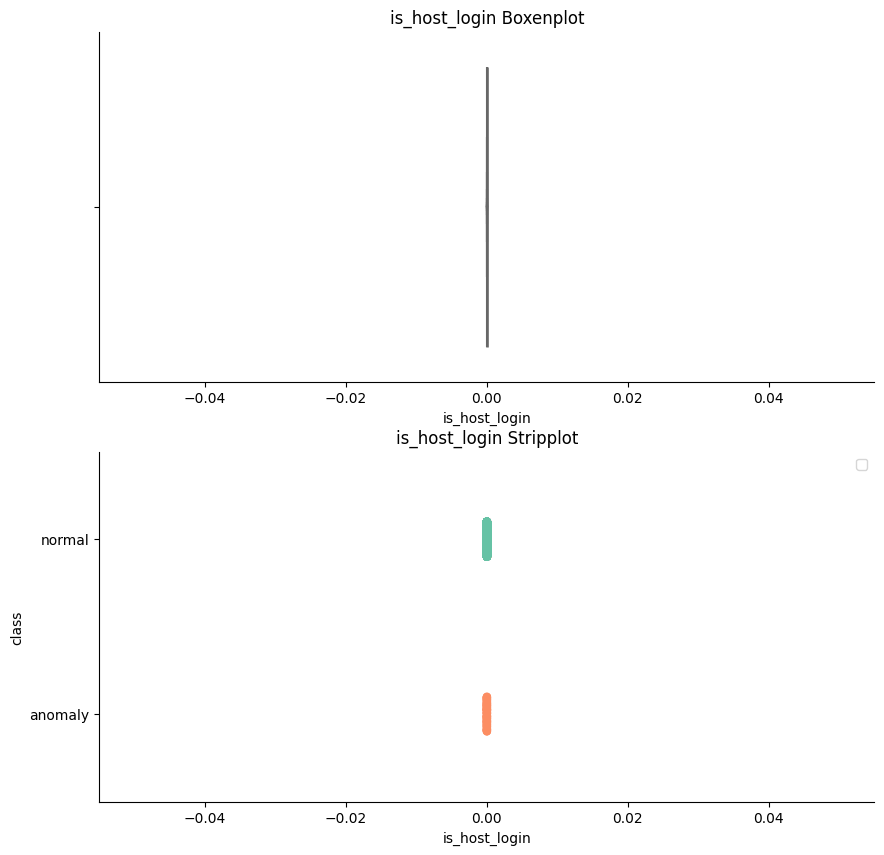

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


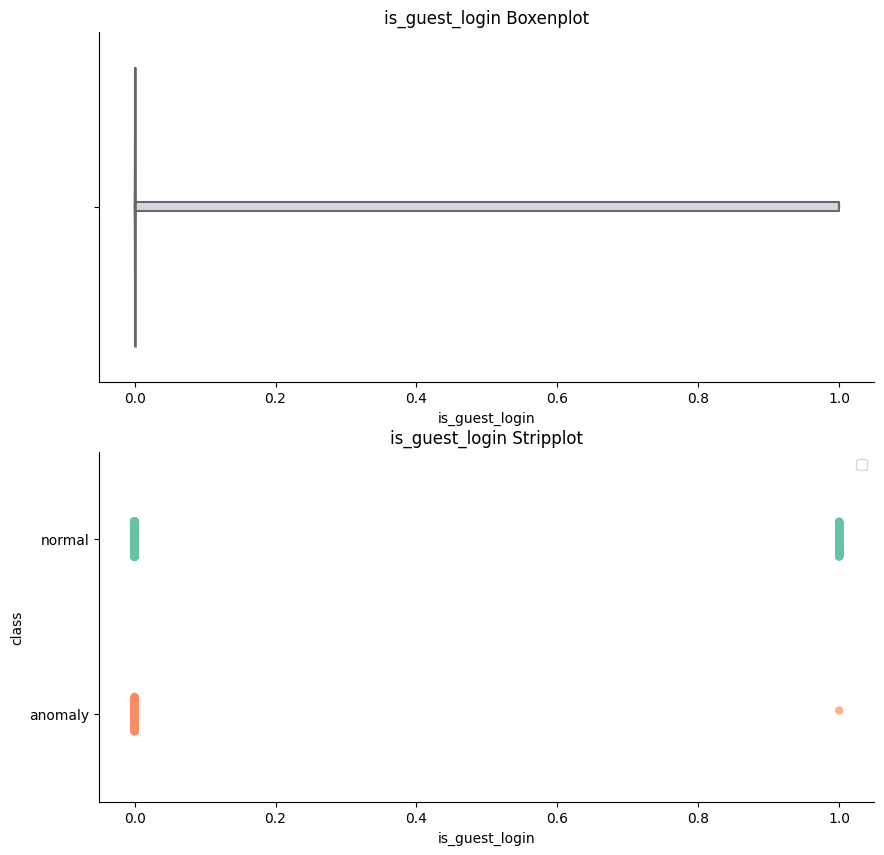

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


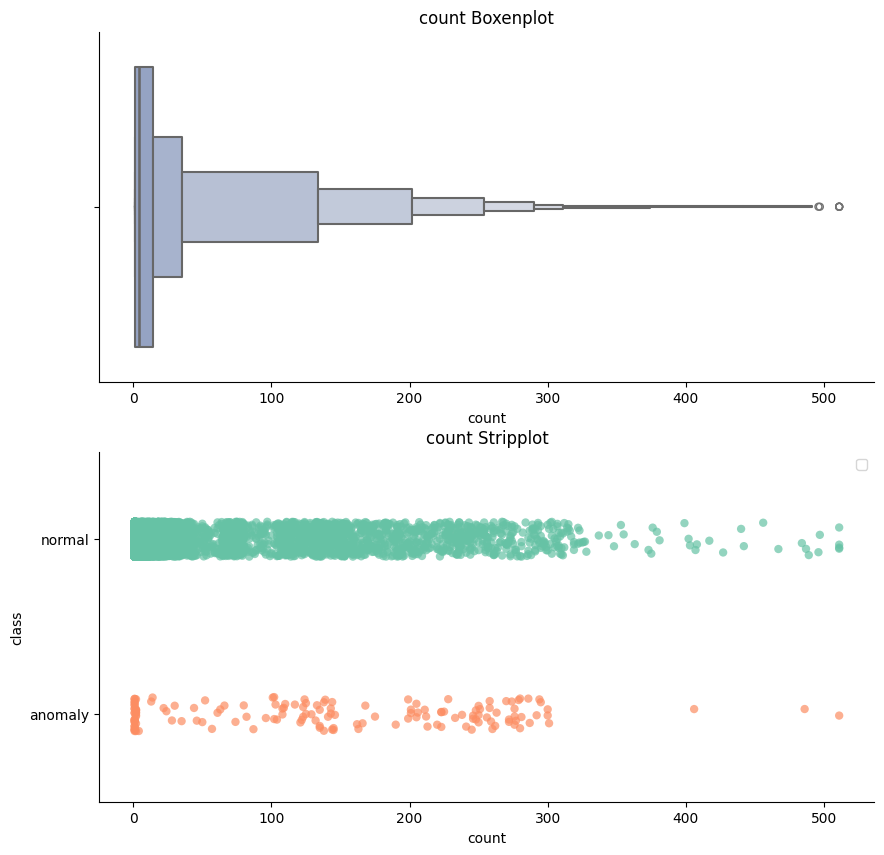

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


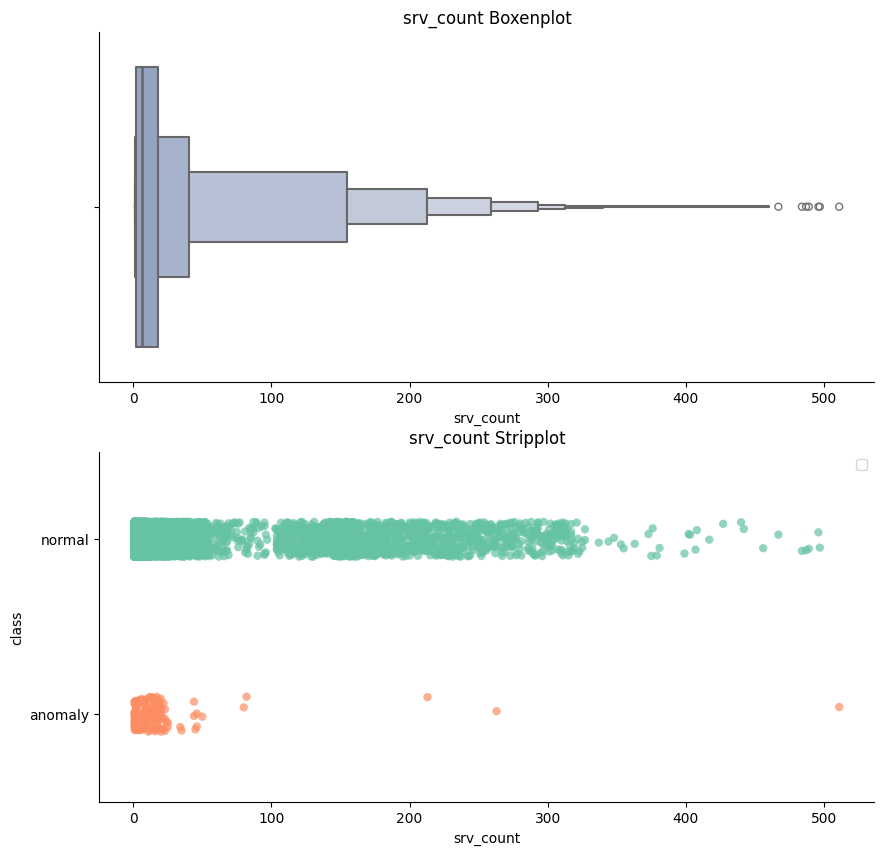

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


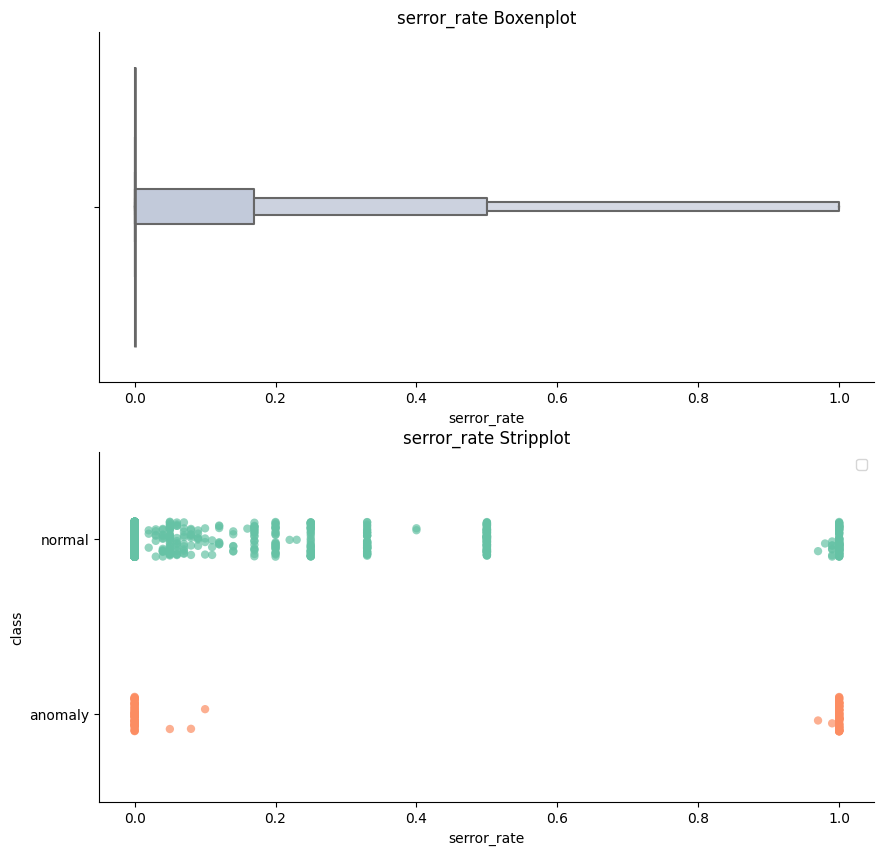

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


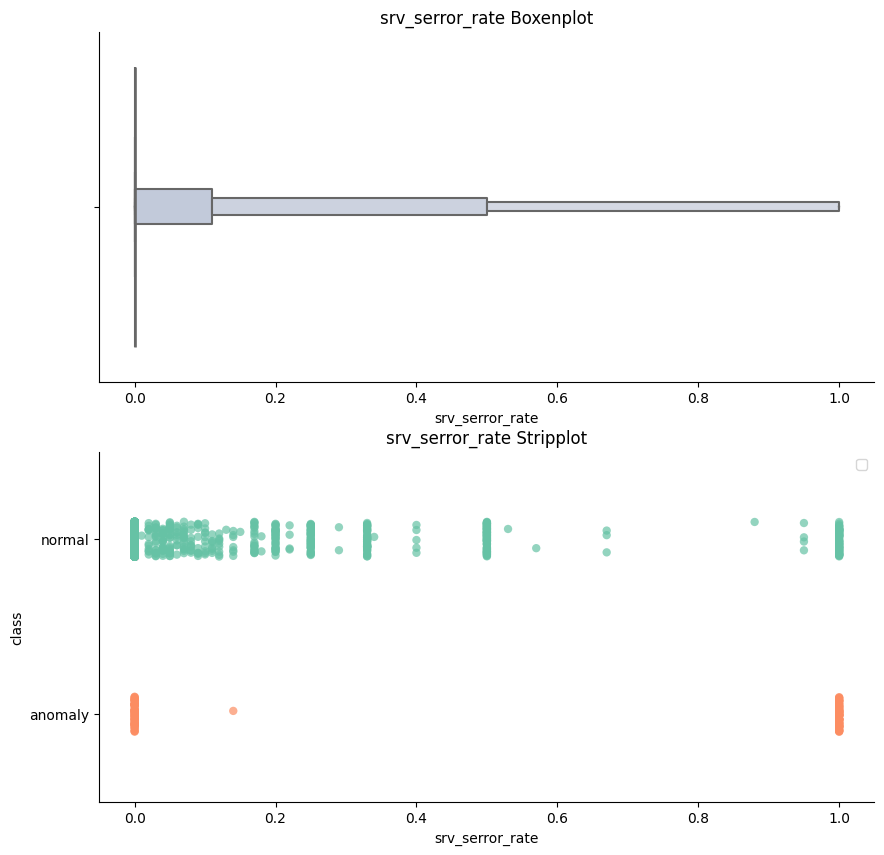

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


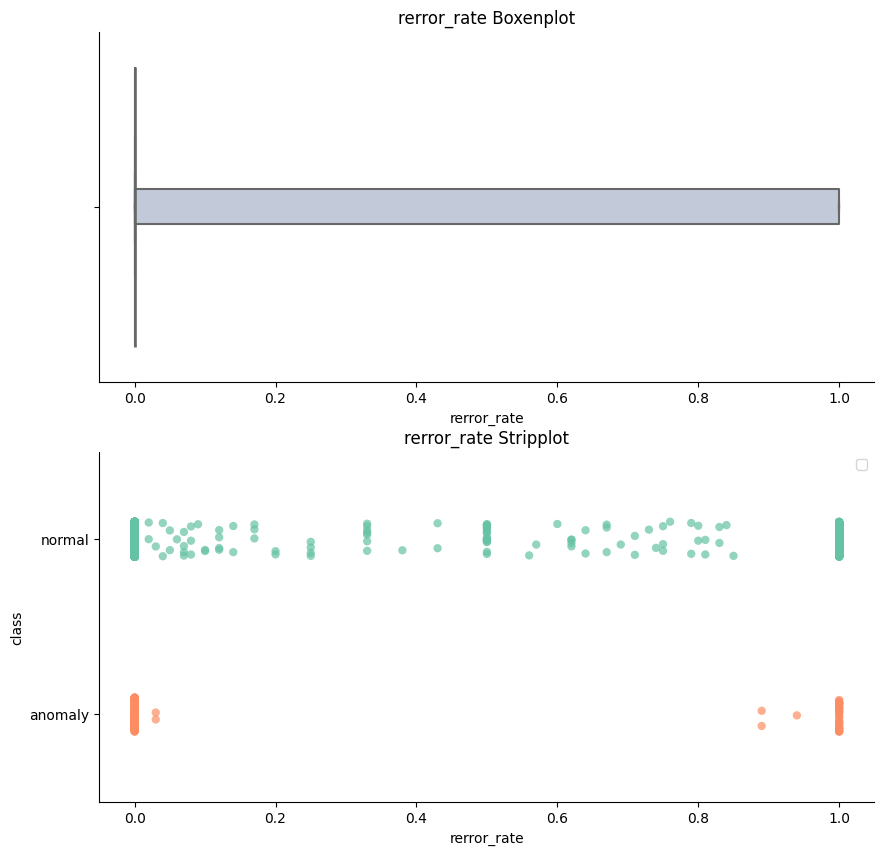

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


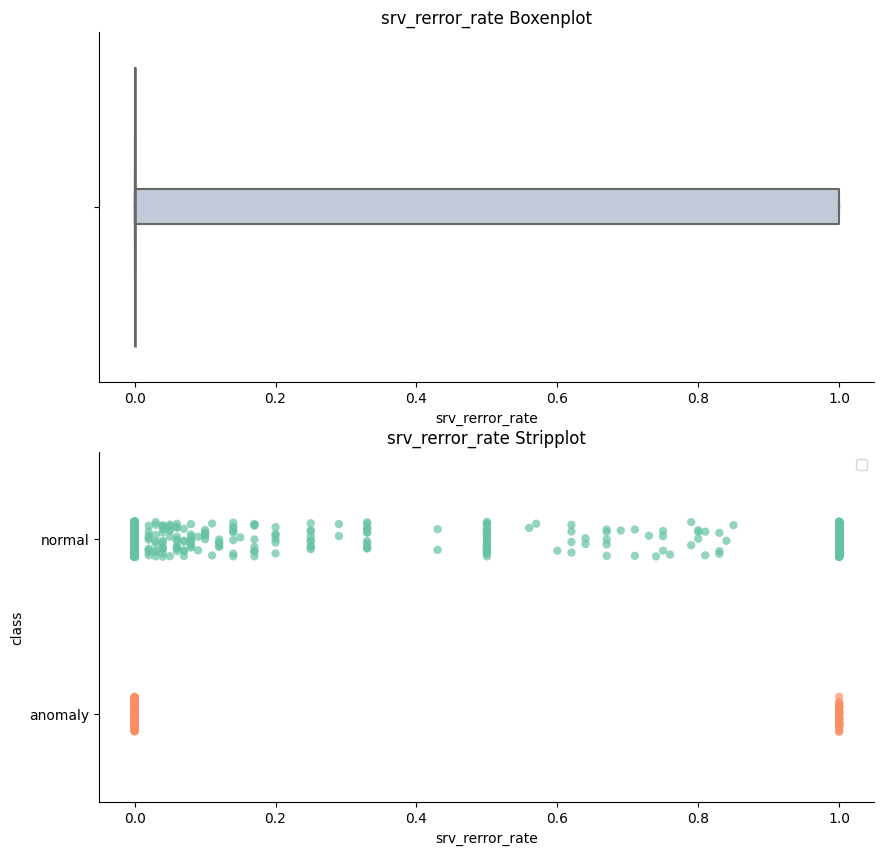

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


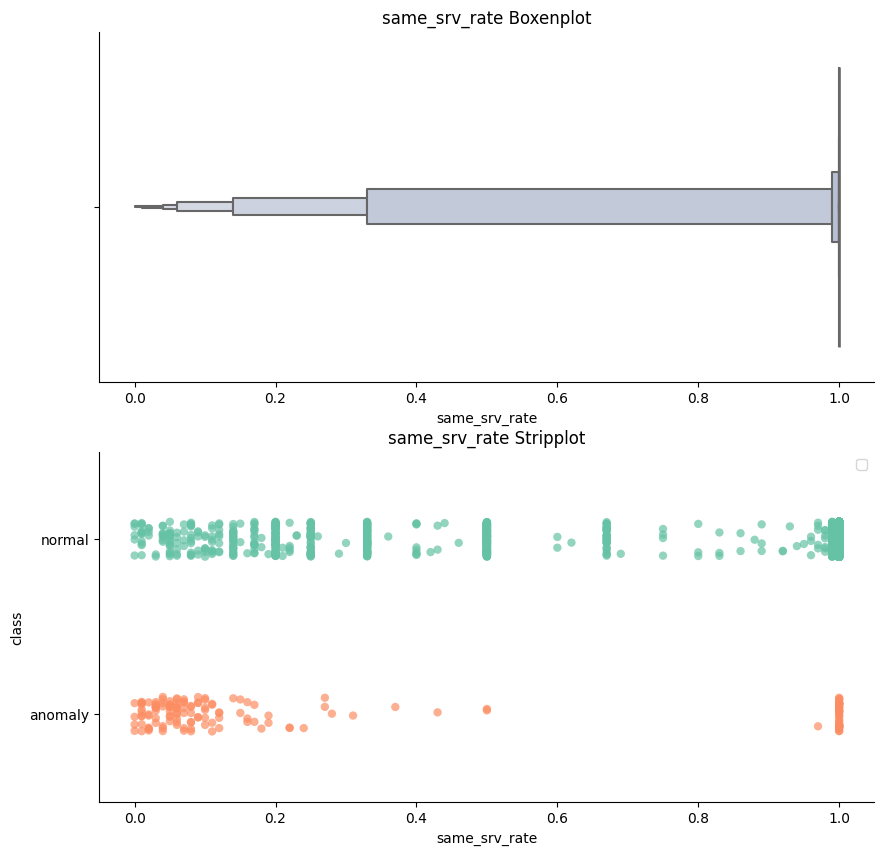

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


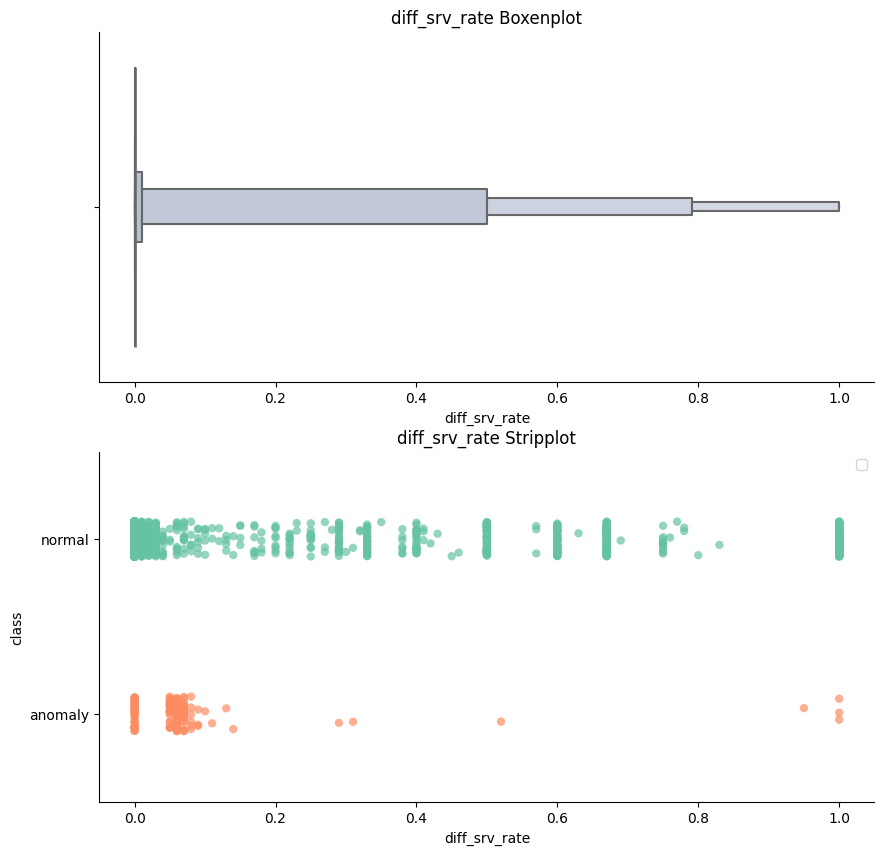

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


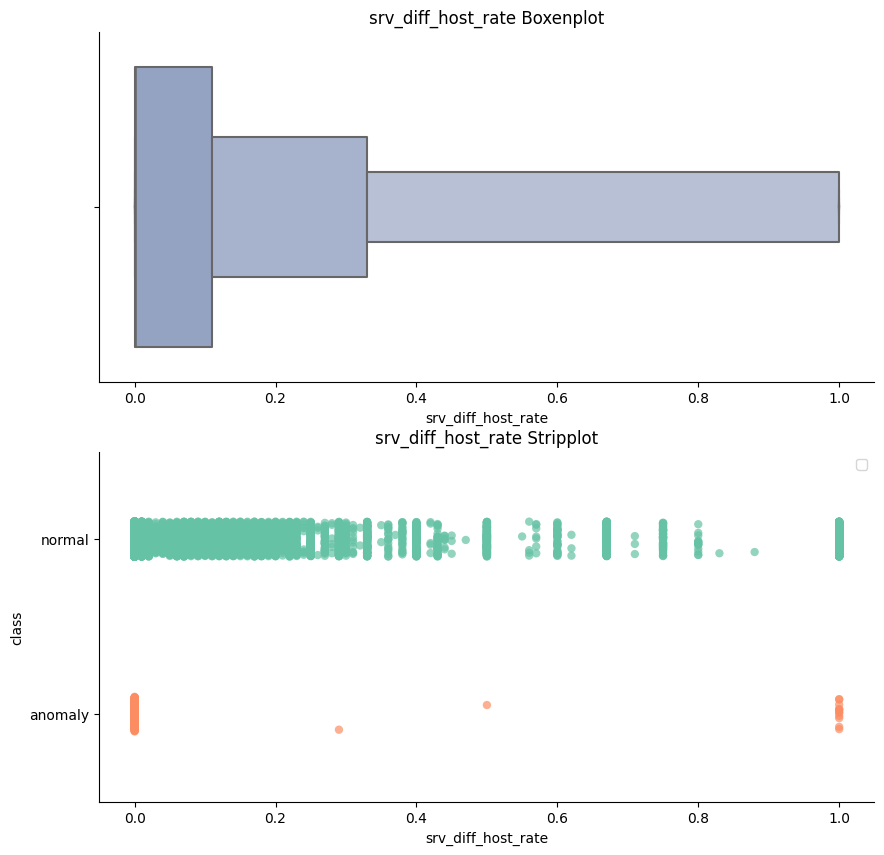

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


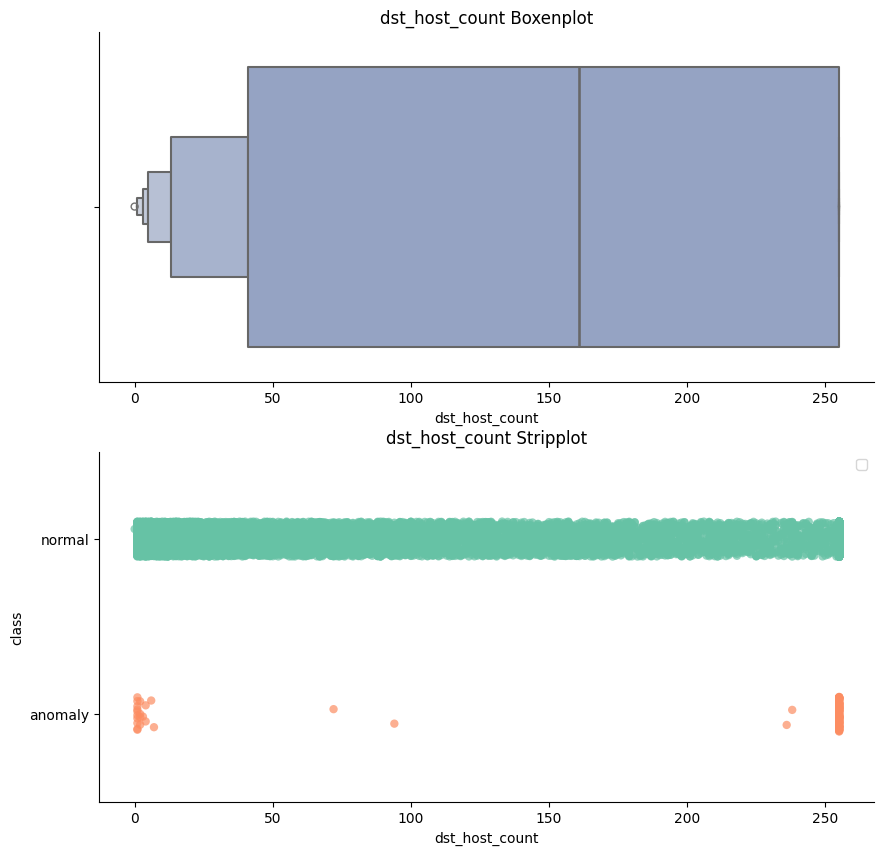

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


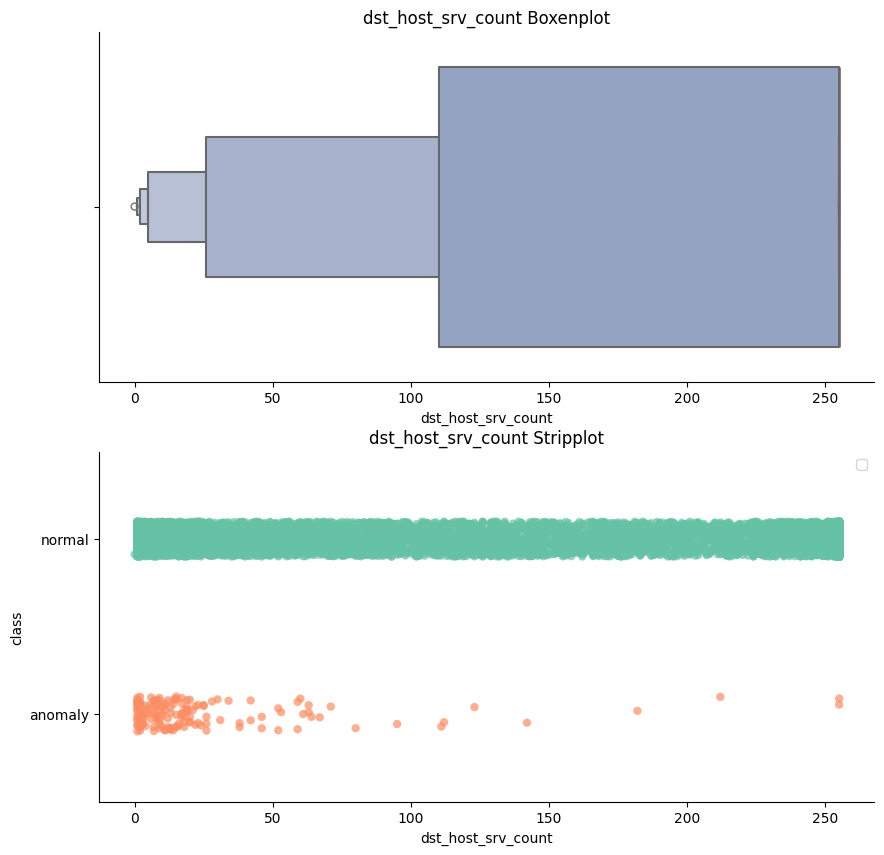

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


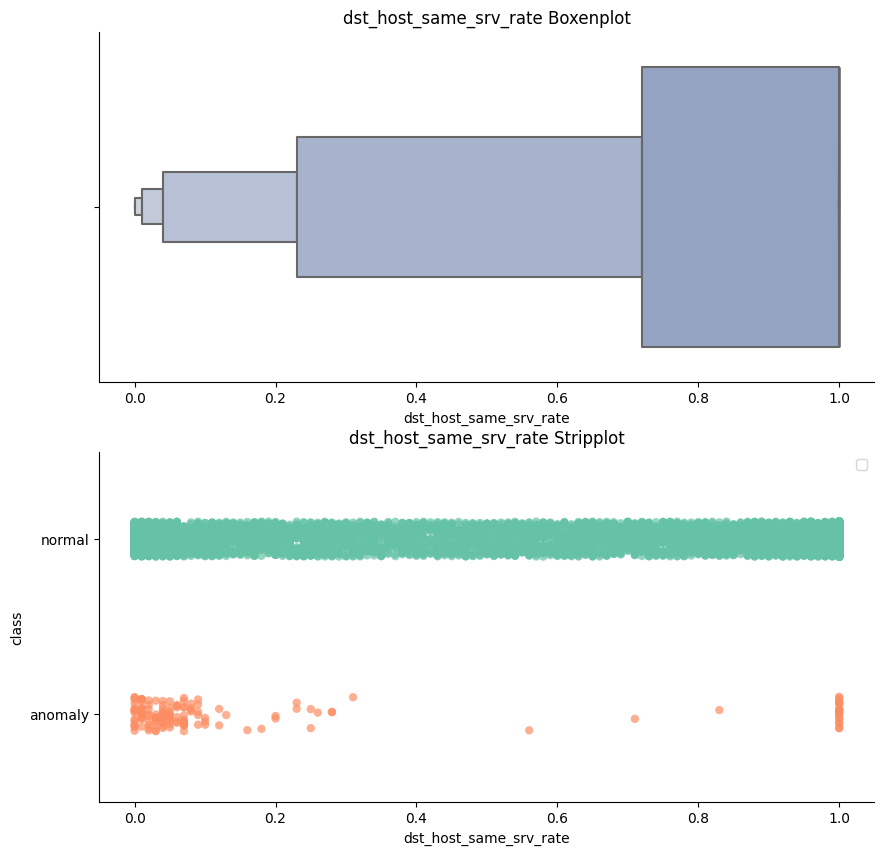

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


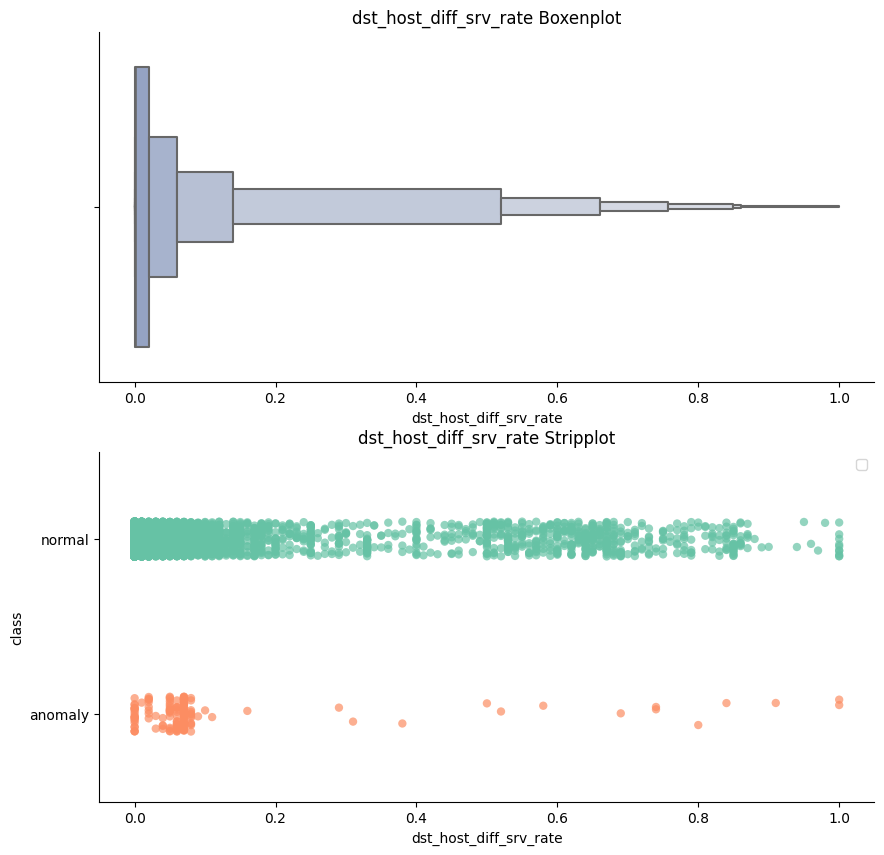

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


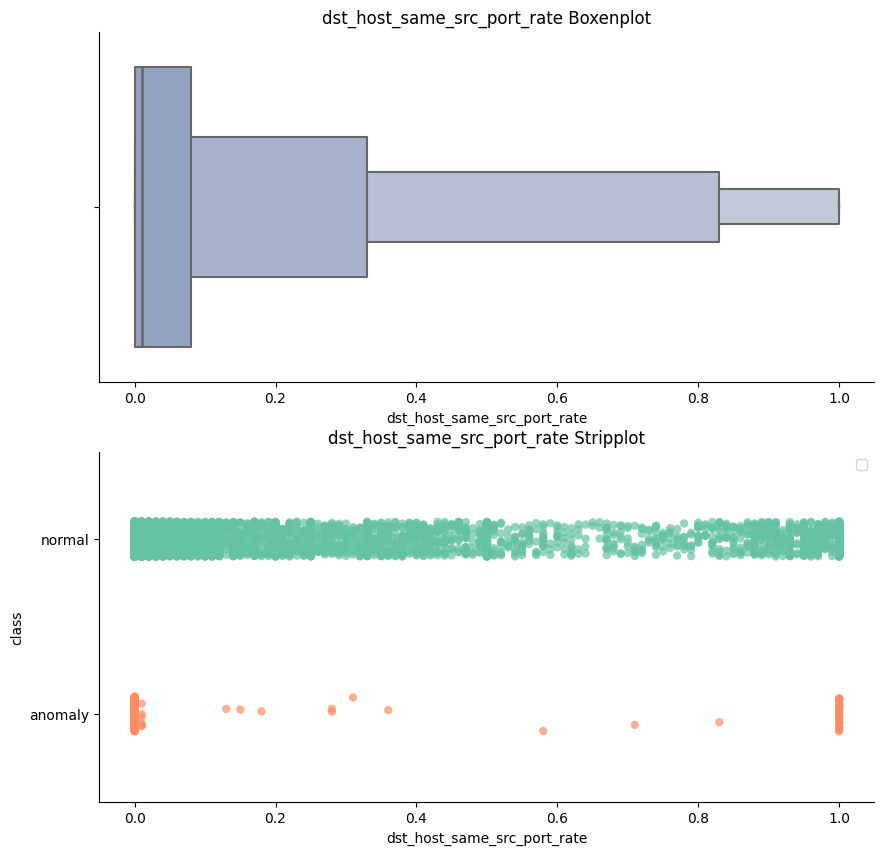

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


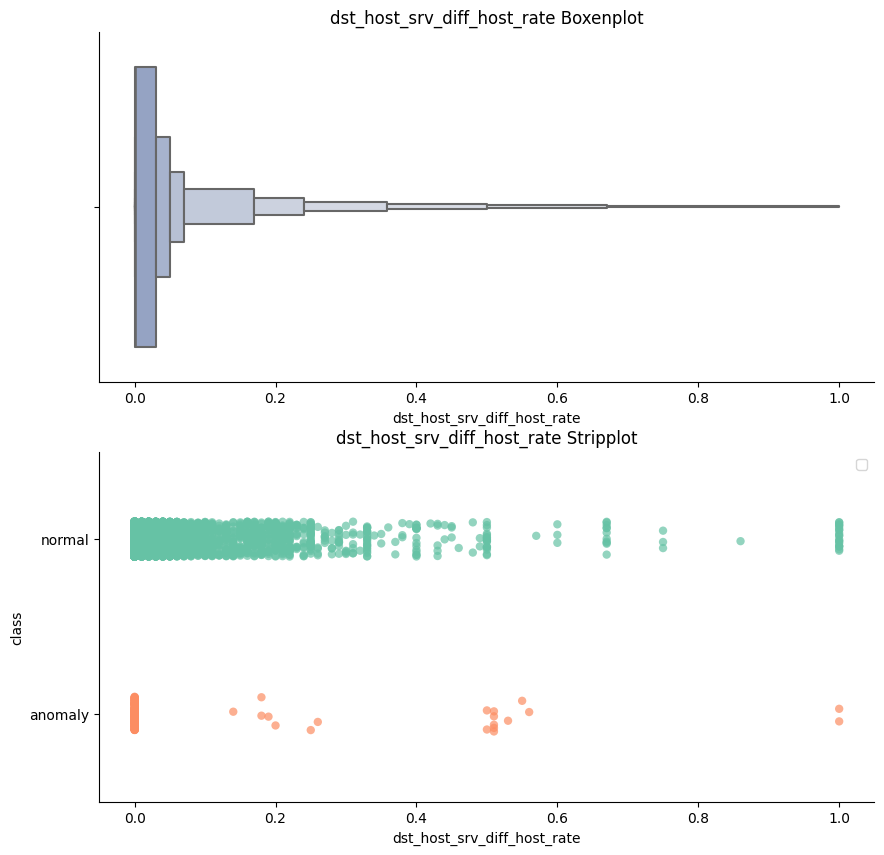

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


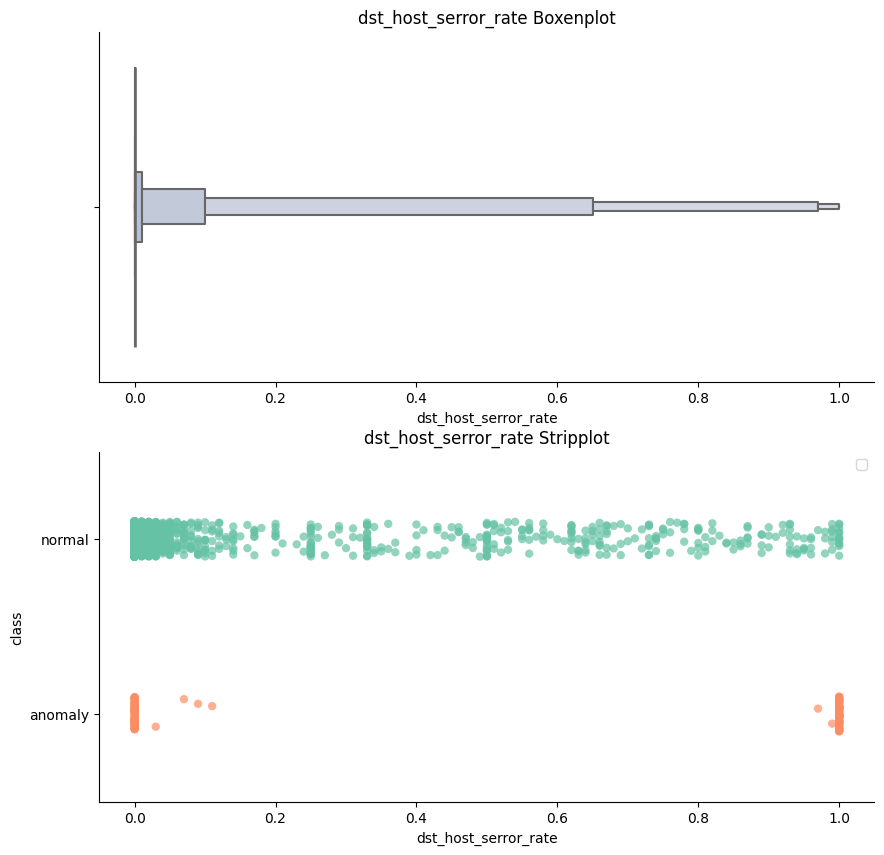

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


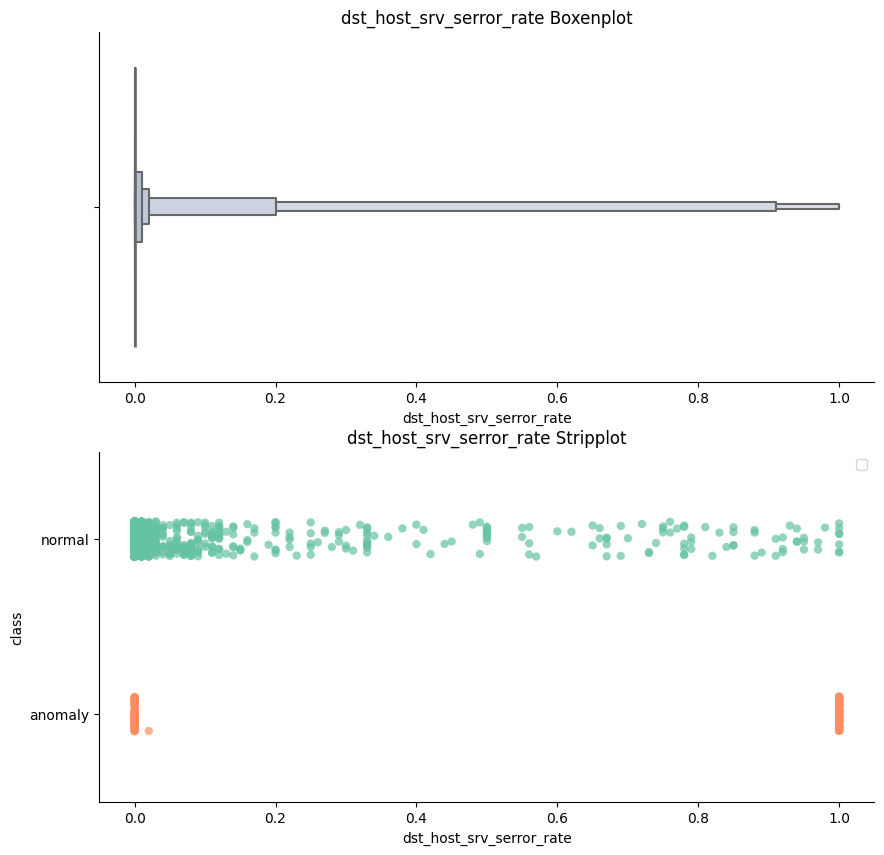

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


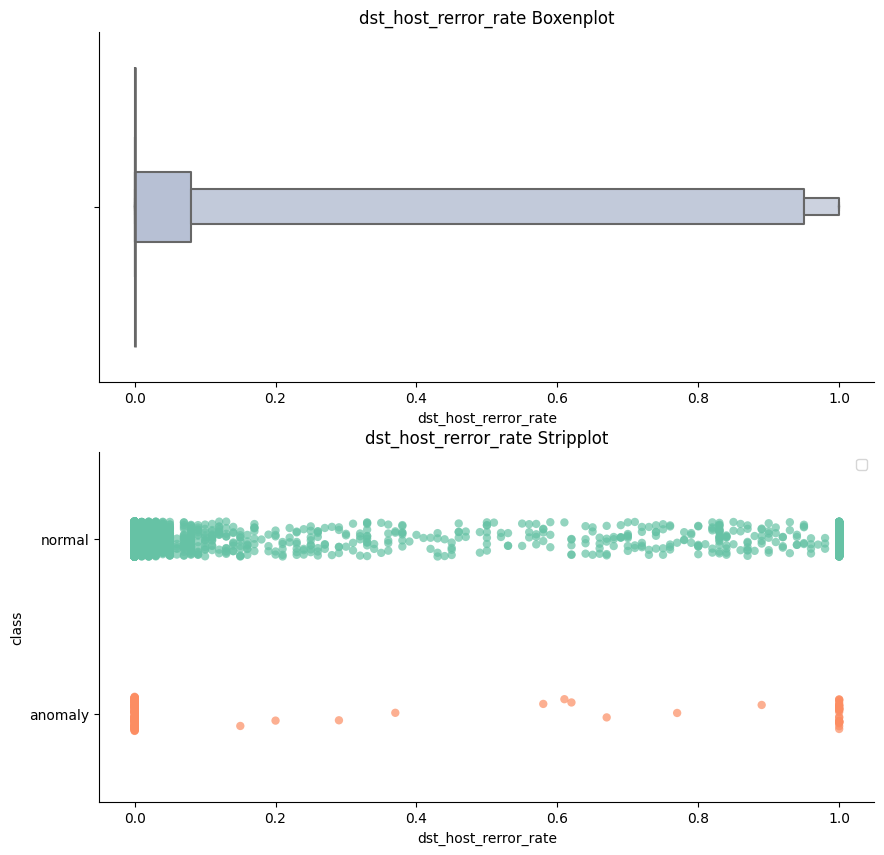

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


<ipython-input-7-6fc9cf03ebf4>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


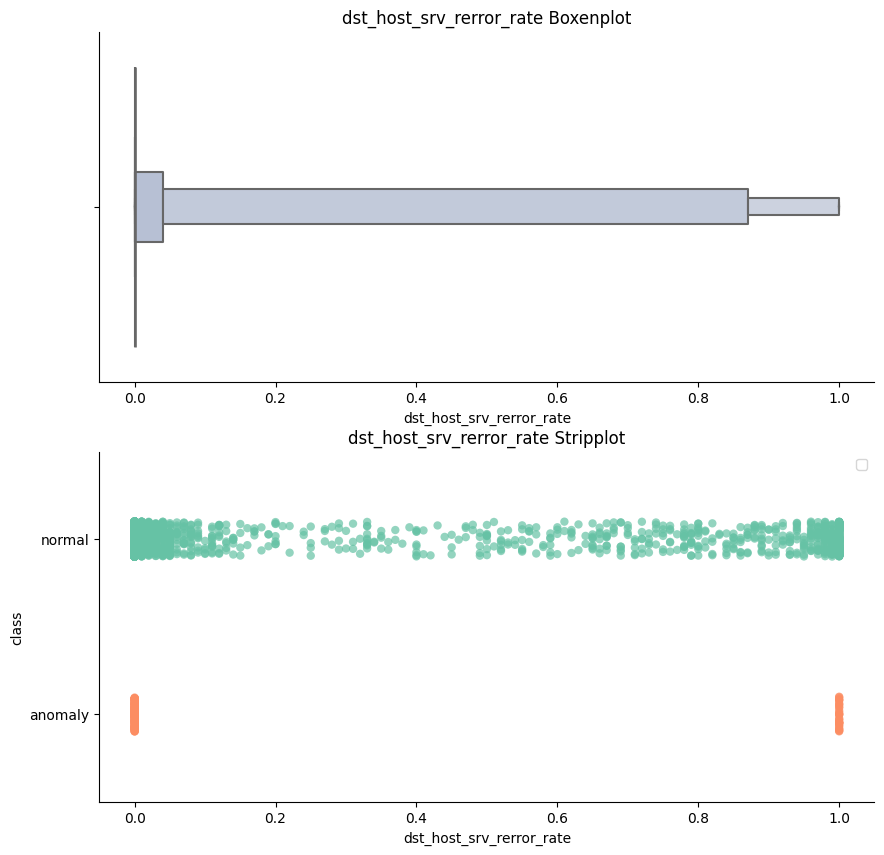

Training Features Shape: (10879, 103)
Training Labels Shape: (10879,)
Testing Features Shape: (2720, 103)
Testing Labels Shape: (2720,)


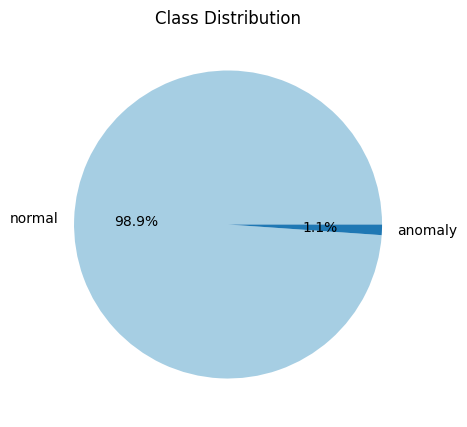

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define custom_palette if it's not defined already
custom_palette = sns.color_palette("Set2")

# Assuming dfPhase is your DataFrame
# Make sure to import necessary libraries for DataFrame creation and preprocessing

# Convert categorical variables into numerical representations (one-hot encoding)
X = pd.get_dummies(dfPhase.drop(columns=['class']))  # Convert all non-'class' columns into one-hot encoded representation
y = dfPhase['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualization
for col in dfPhase.columns:
    if col != 'class' and pd.api.types.is_numeric_dtype(dfPhase[col]):
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        g1 = sns.boxenplot(x=dfPhase[col], ax=ax[0], color=custom_palette[2], linewidth=1.5)
        g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)
        ax[0].set_title(f"{col} Boxenplot")
        ax[0].set_xlabel(col)
        ax[1].set_title(f"{col} Stripplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("class")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        g2.legend(loc='upper right')
        plt.show()
        print("Training Features Shape:", X_train.shape)
        print("Training Labels Shape:", y_train.shape)
        print("Testing Features Shape:", X_test.shape)
        print("Testing Labels Shape:", y_test.shape)

# Pie chart to visualize class distribution
plt.figure(figsize=(5, 5))
class_counts = dfPhase['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Paired"))
plt.title('Class Distribution')
plt.show()

<Axes: title={'center': 'Feature-correlation (pearson)'}>

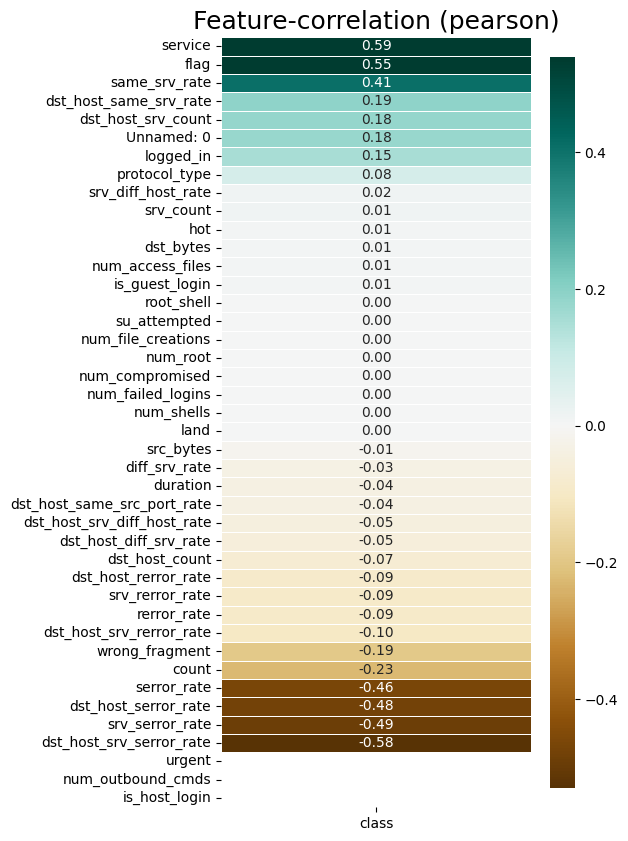

In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Encode the 'class' column
dfPhase['class'] = LabelEncoder().fit_transform(dfPhase['class'])

# Encode all non-numeric columns except 'class'
for col in dfPhase.columns:
    if col != 'class' and not pd.api.types.is_numeric_dtype(dfPhase[col]):
        dfPhase[col] = ce.LeaveOneOutEncoder().fit_transform(dfPhase[col], dfPhase['class'])

# using correlation matrix to find the most important features
kl.corr_plot(dfPhase, figsize=(5, 10), target='class')  # Assuming kl is defined elsewhere

Ensemble Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      2720
   macro avg       1.00      1.00      1.00      2720
weighted avg       1.00      1.00      1.00      2720



<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


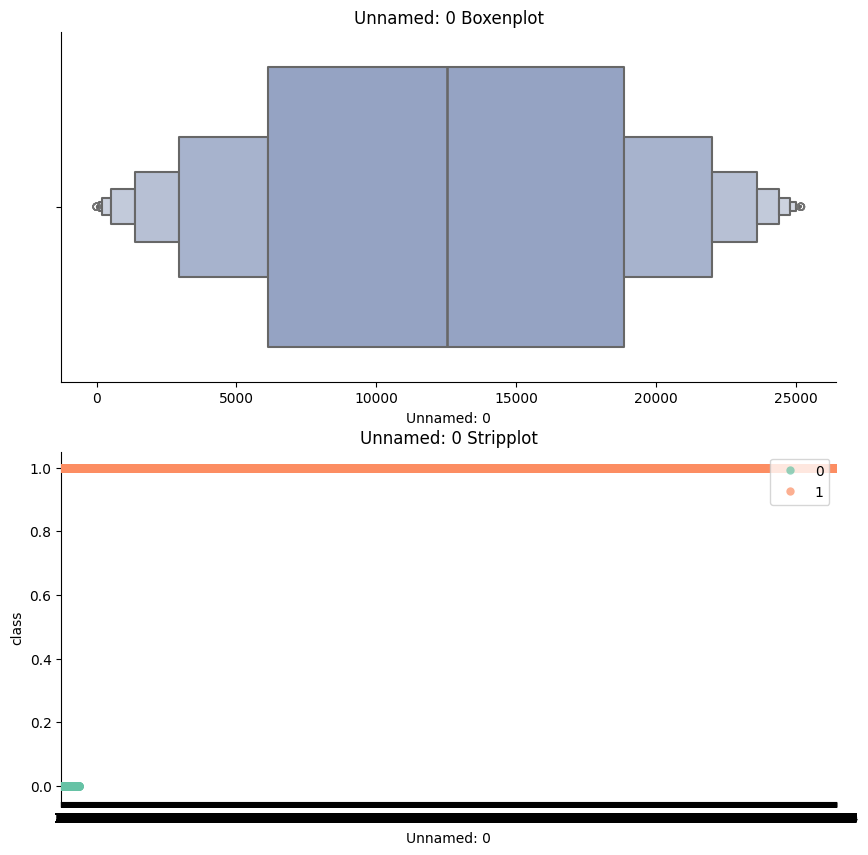

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


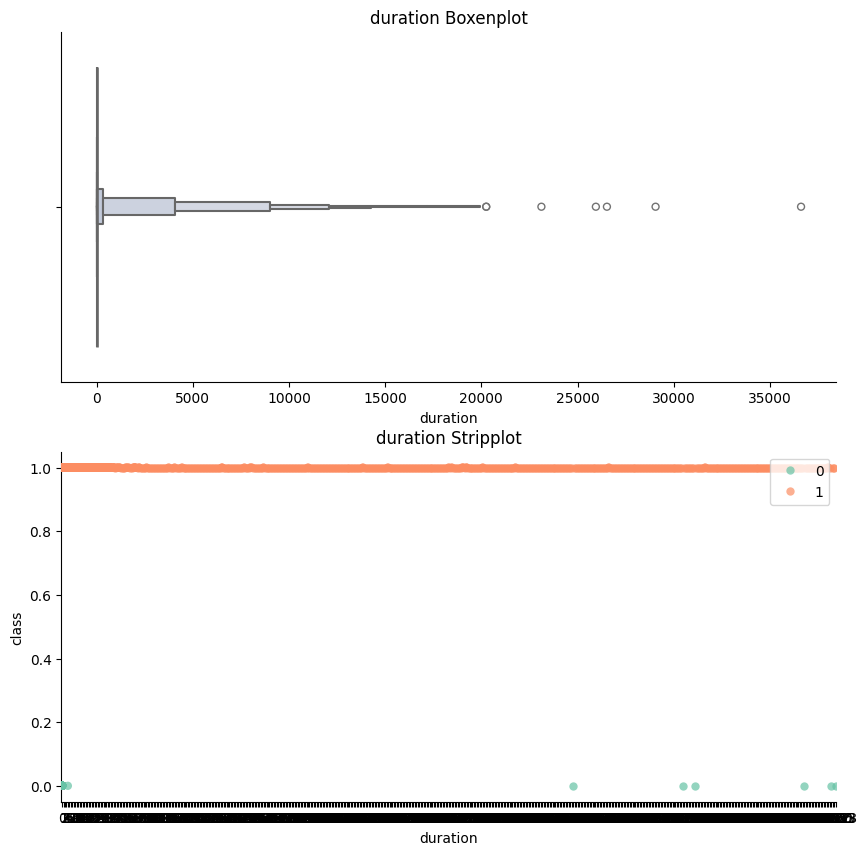

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


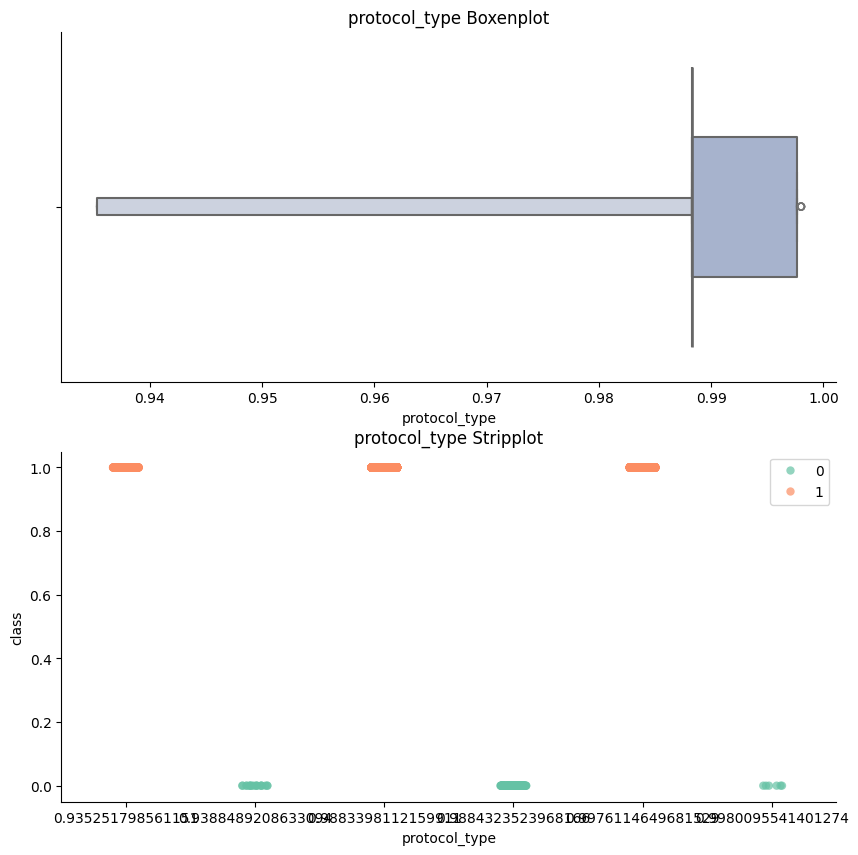

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


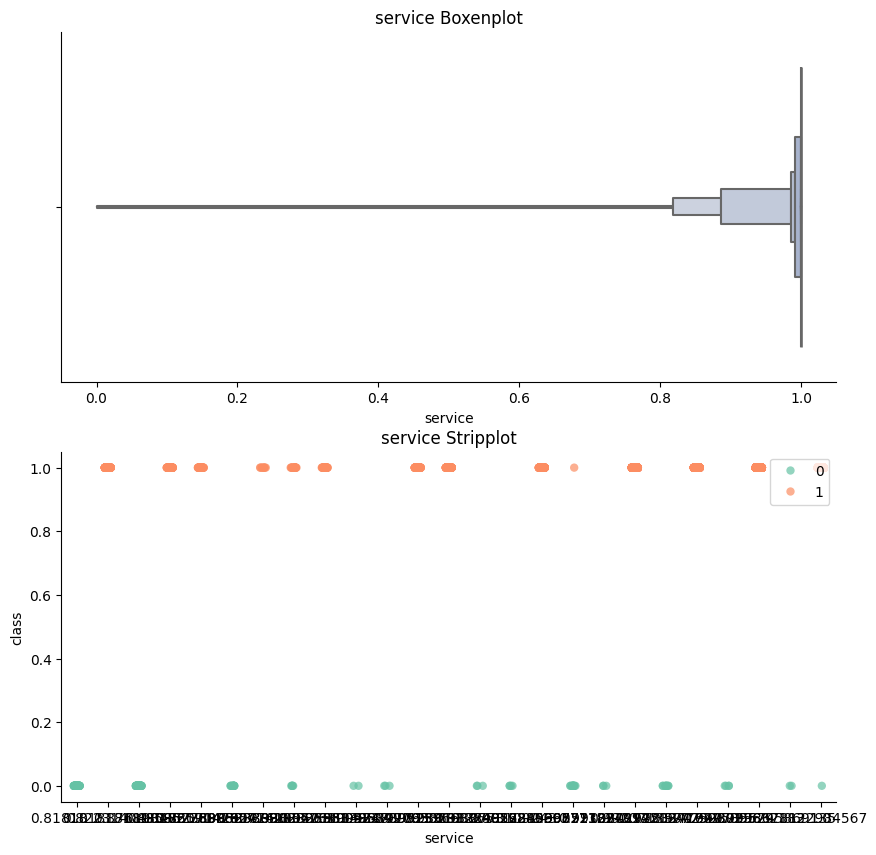

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


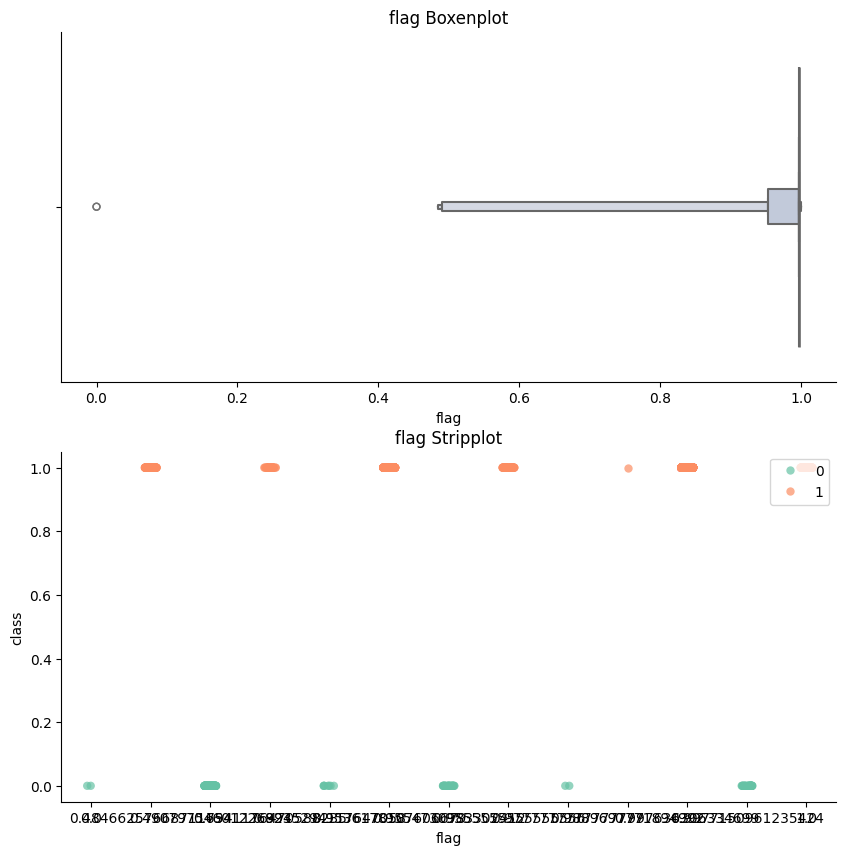

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


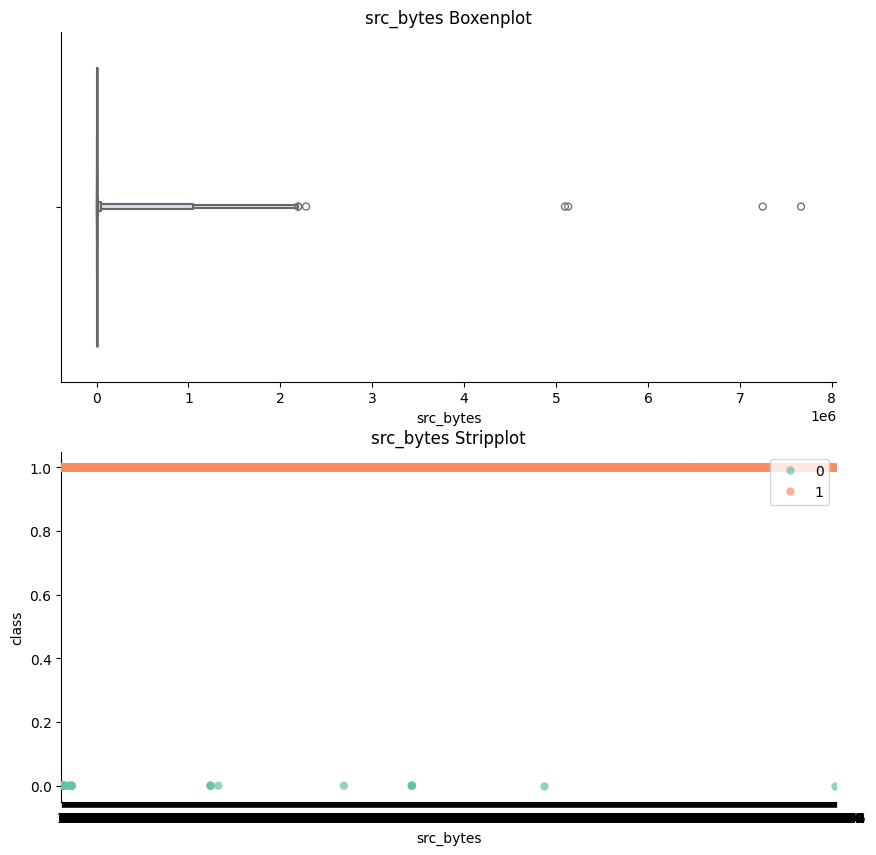

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


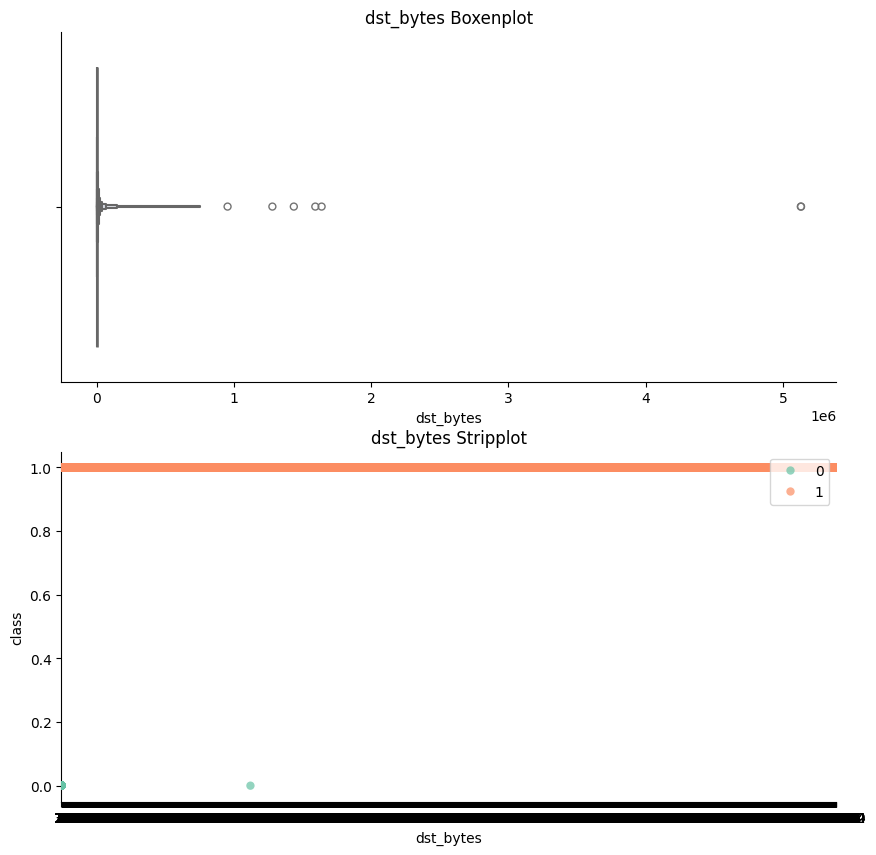

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


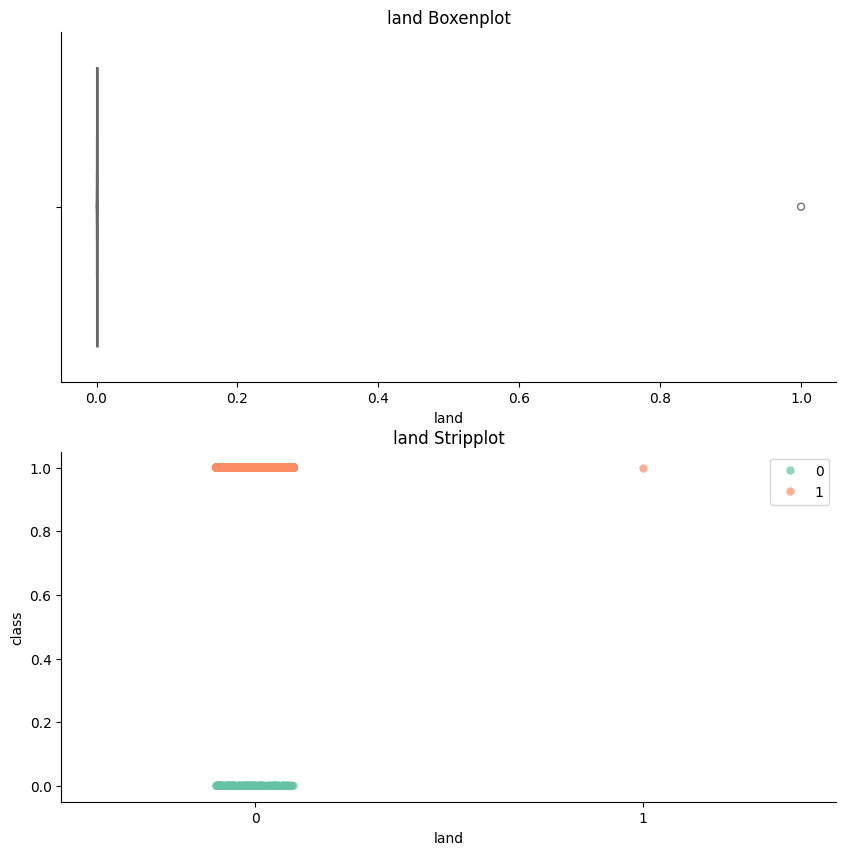

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


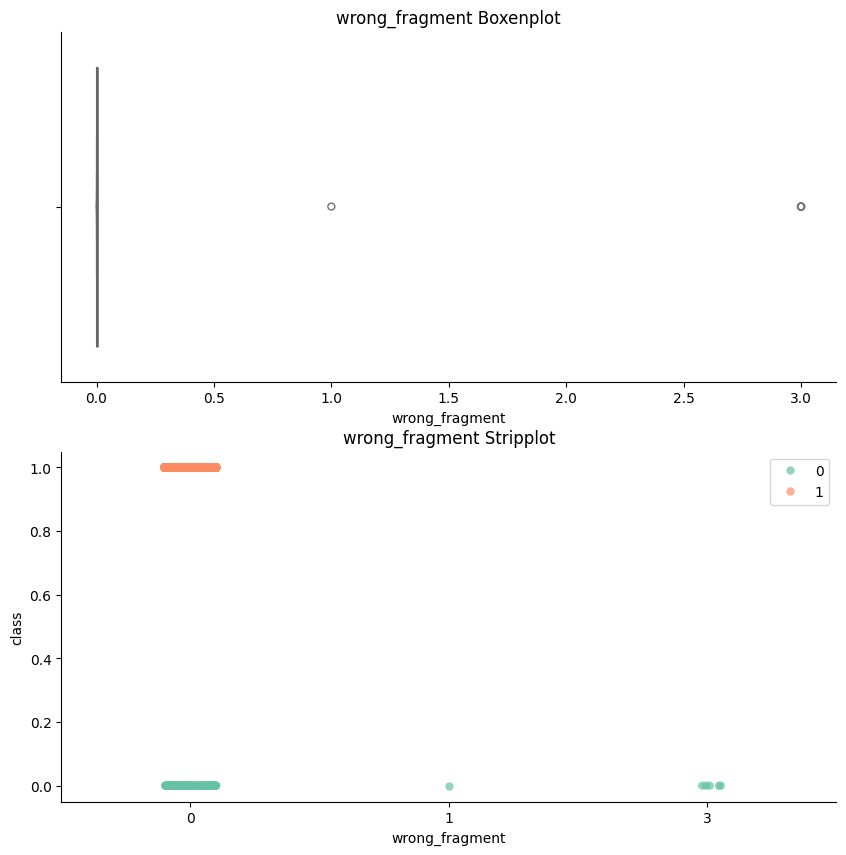

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


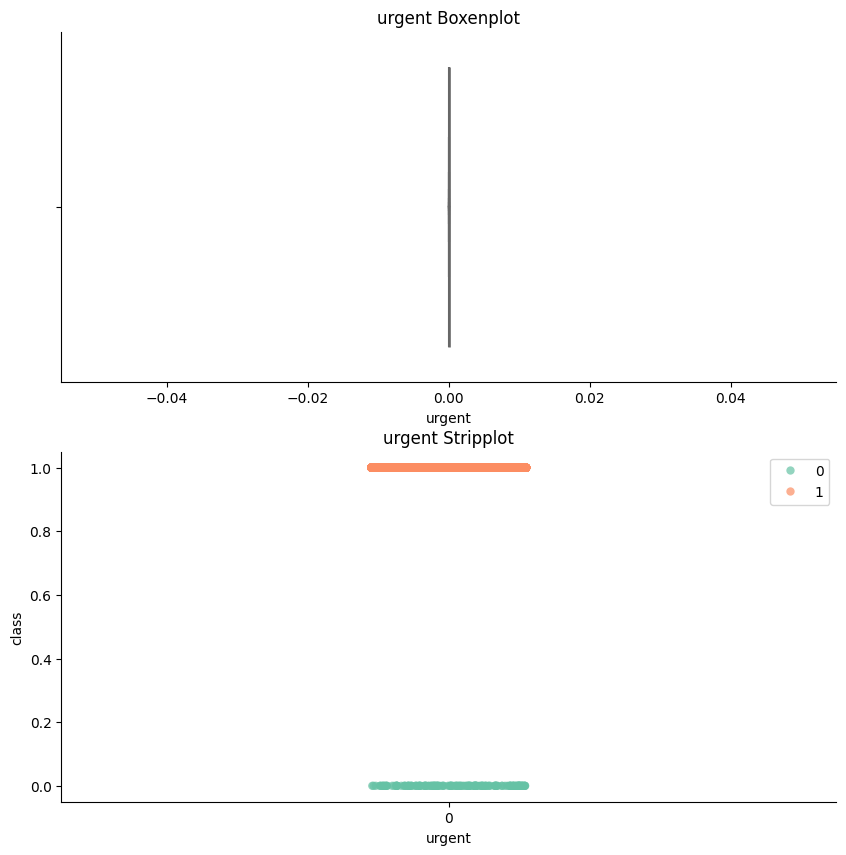

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


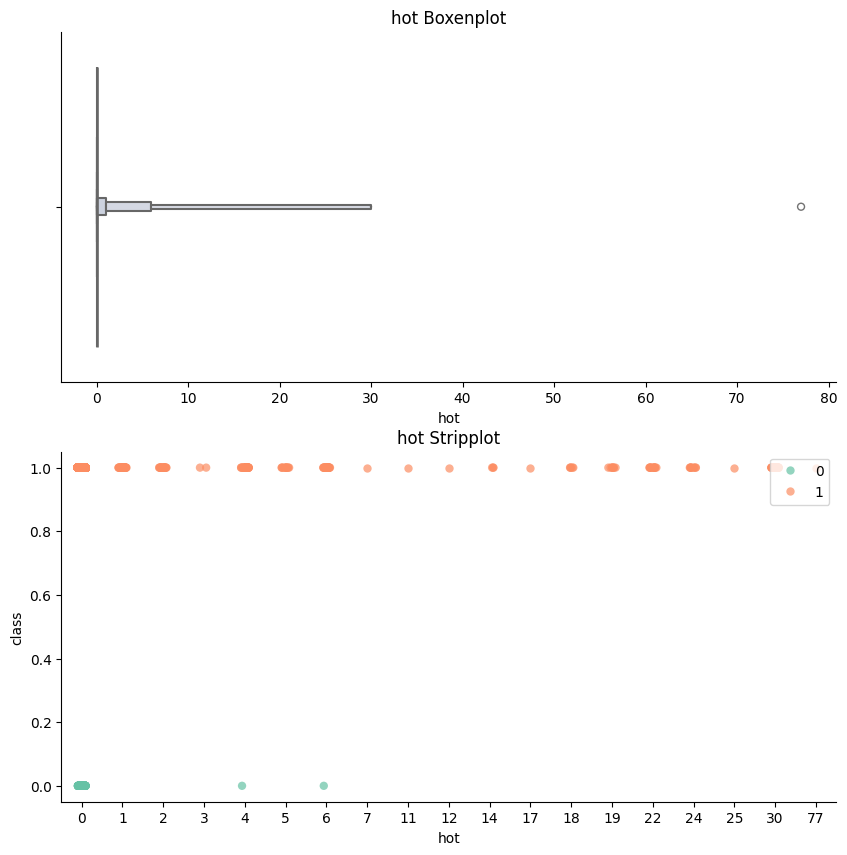

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


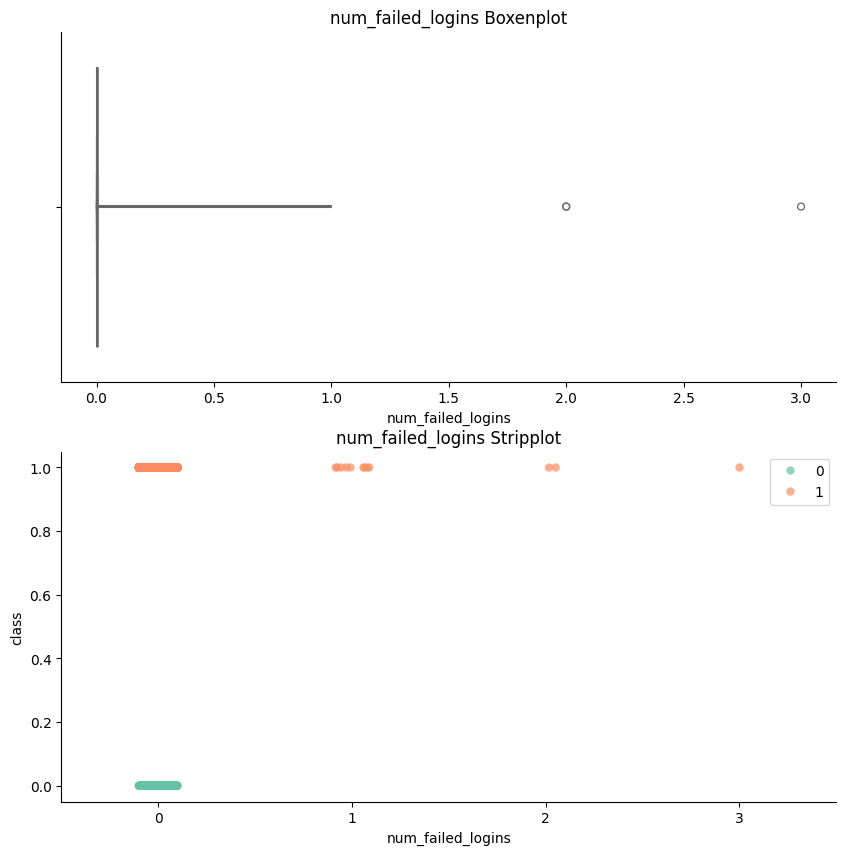

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


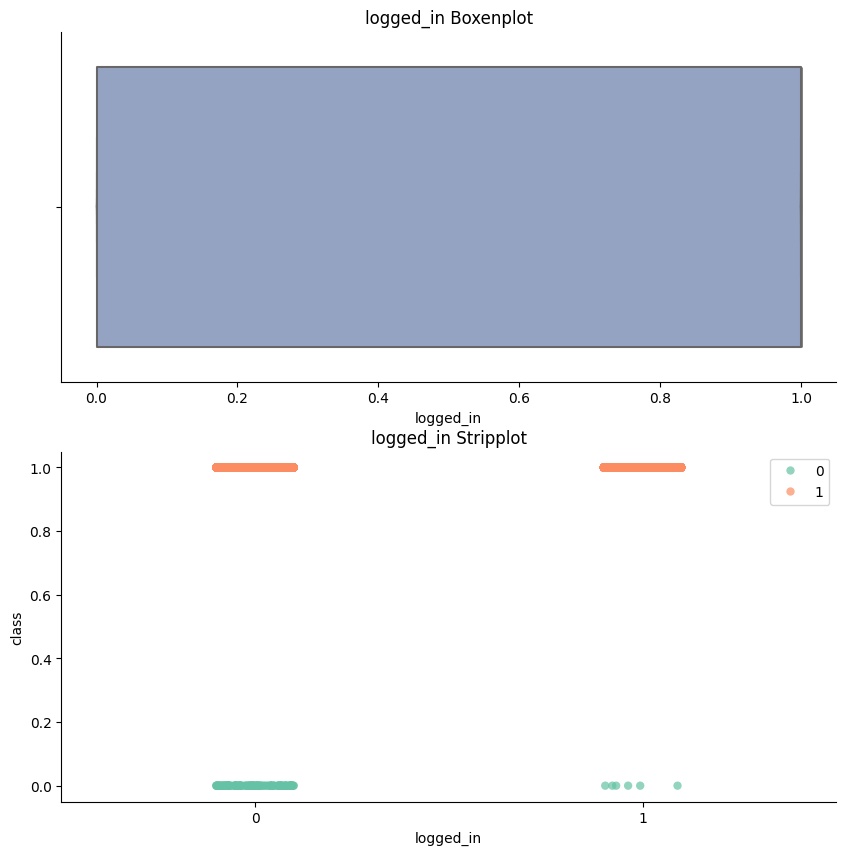

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


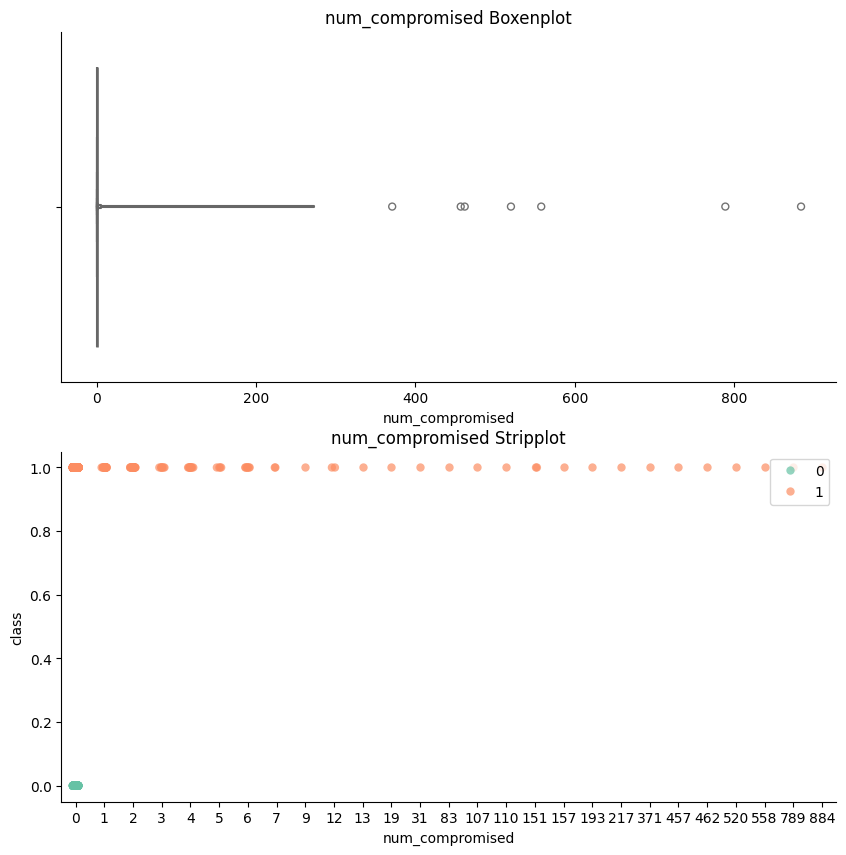

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


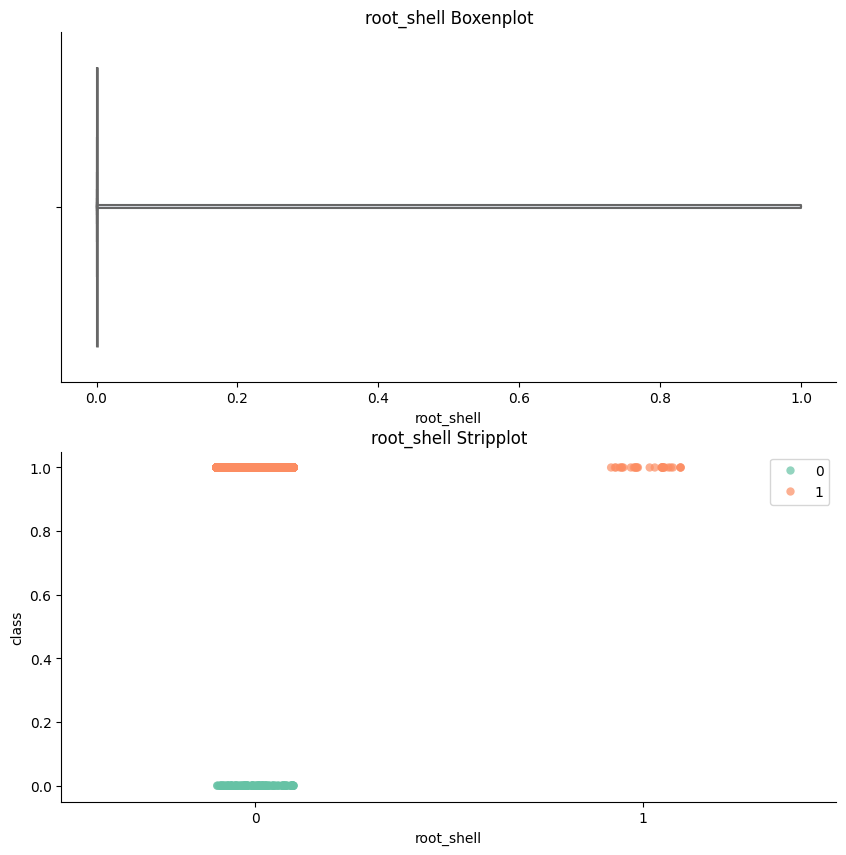

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


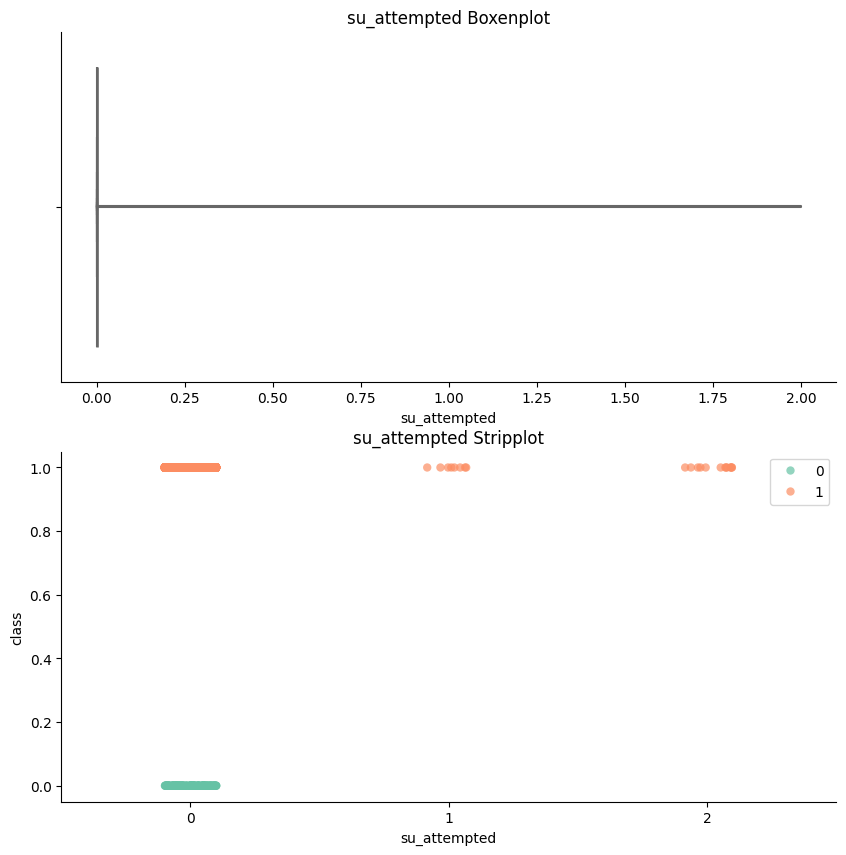

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


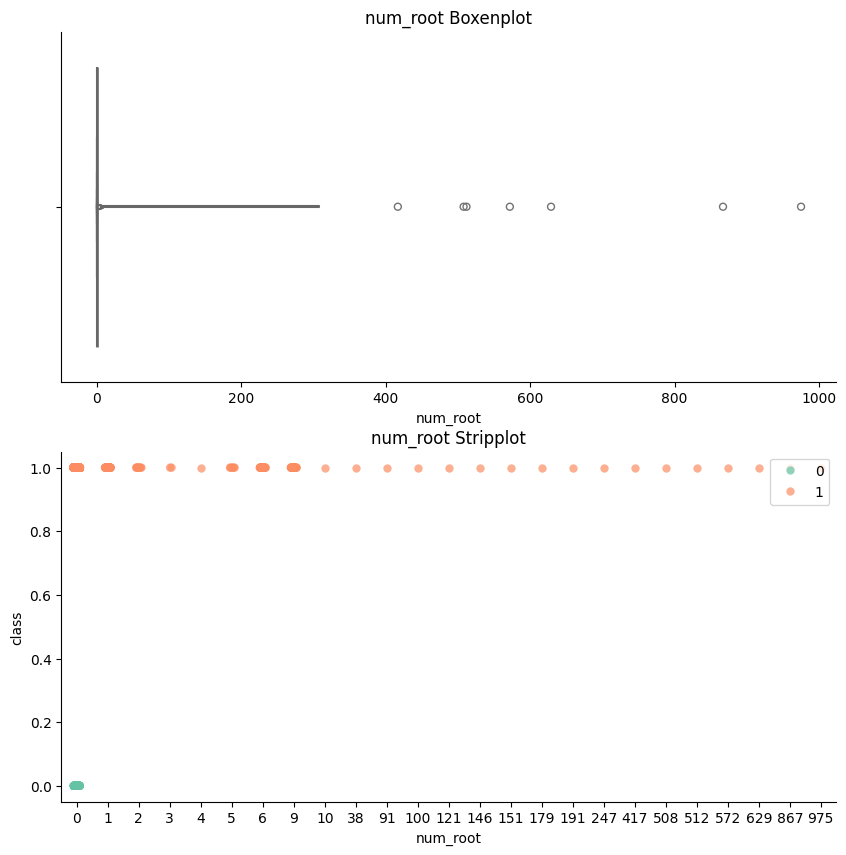

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


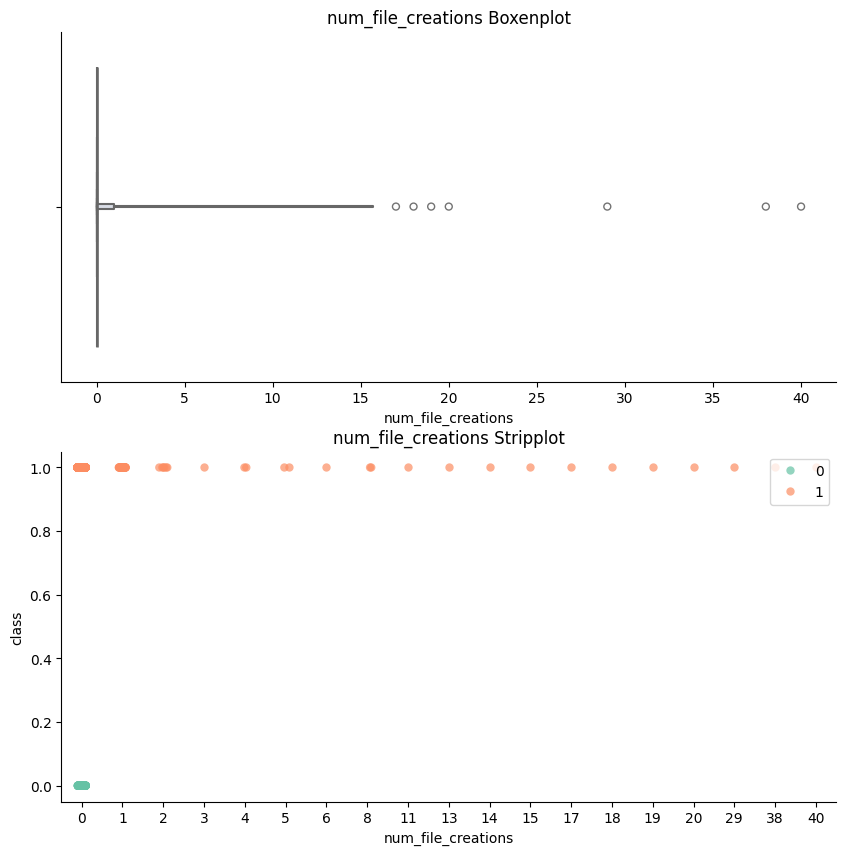

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


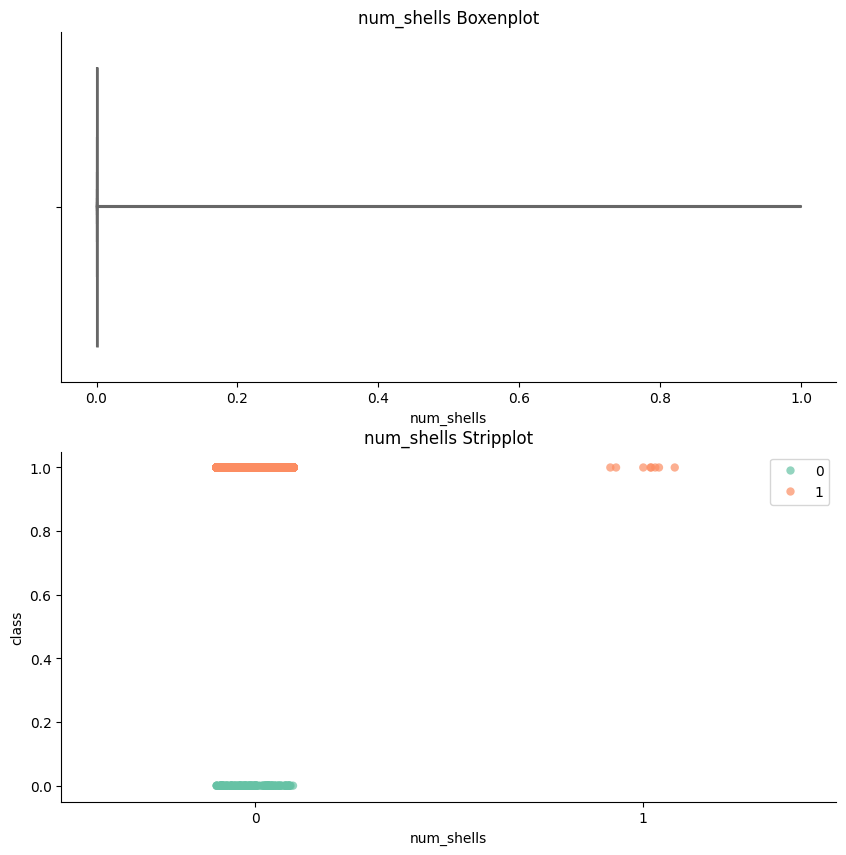

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


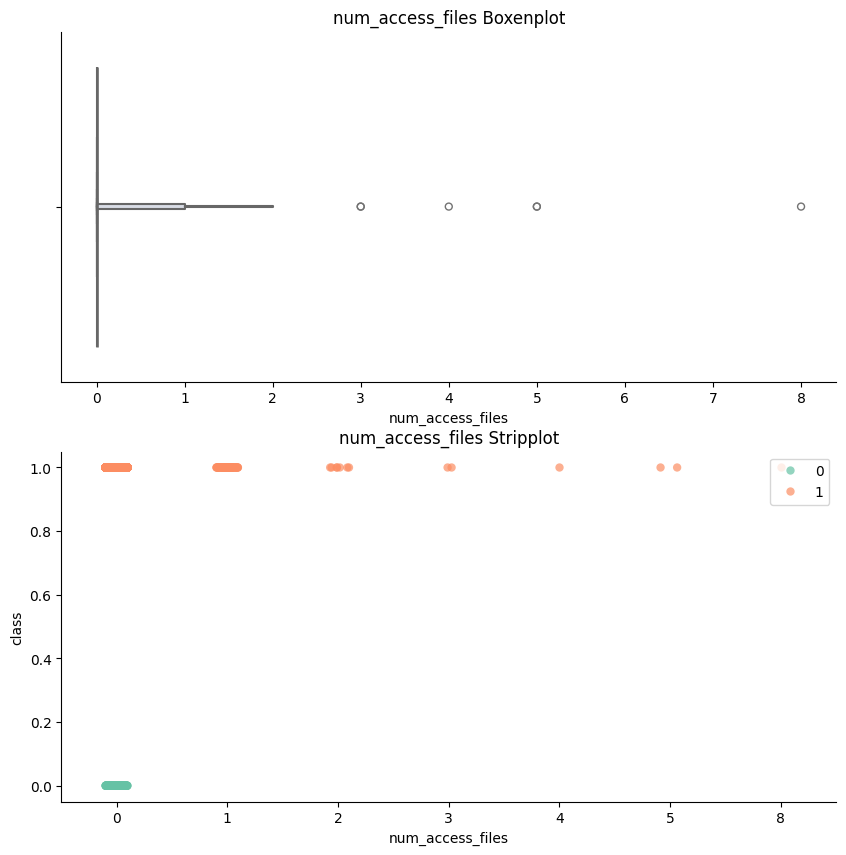

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


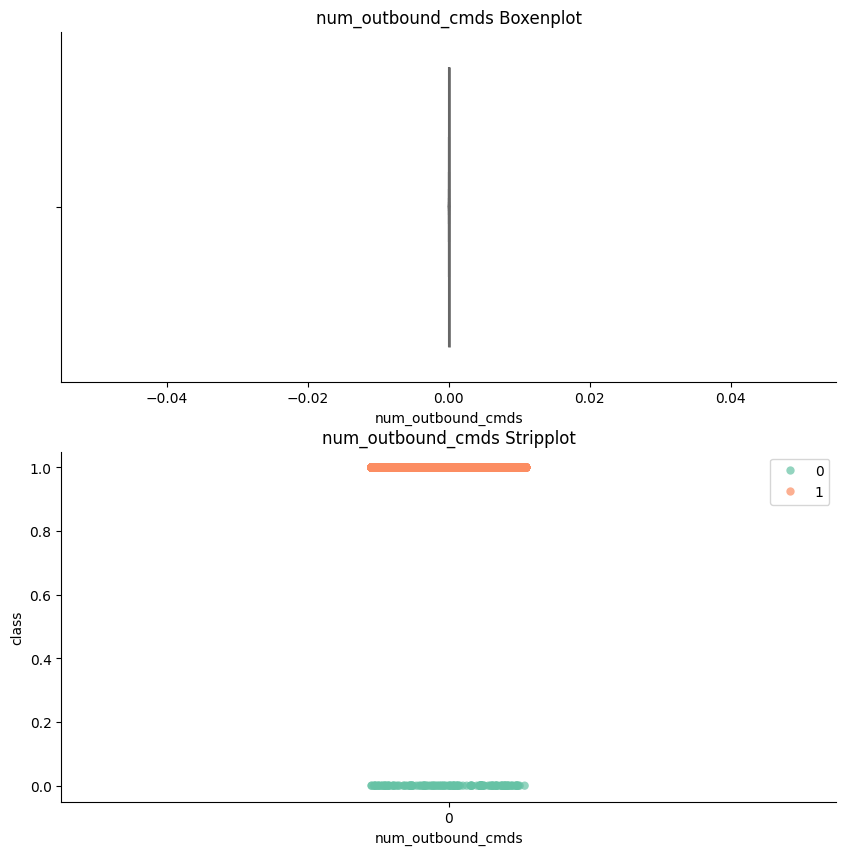

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


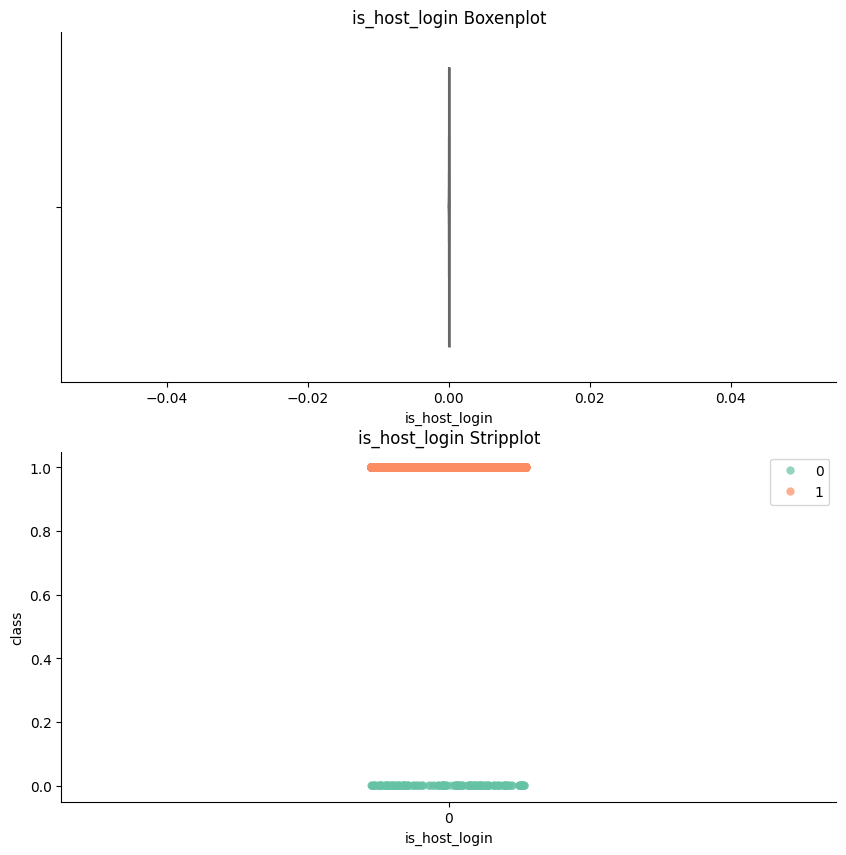

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


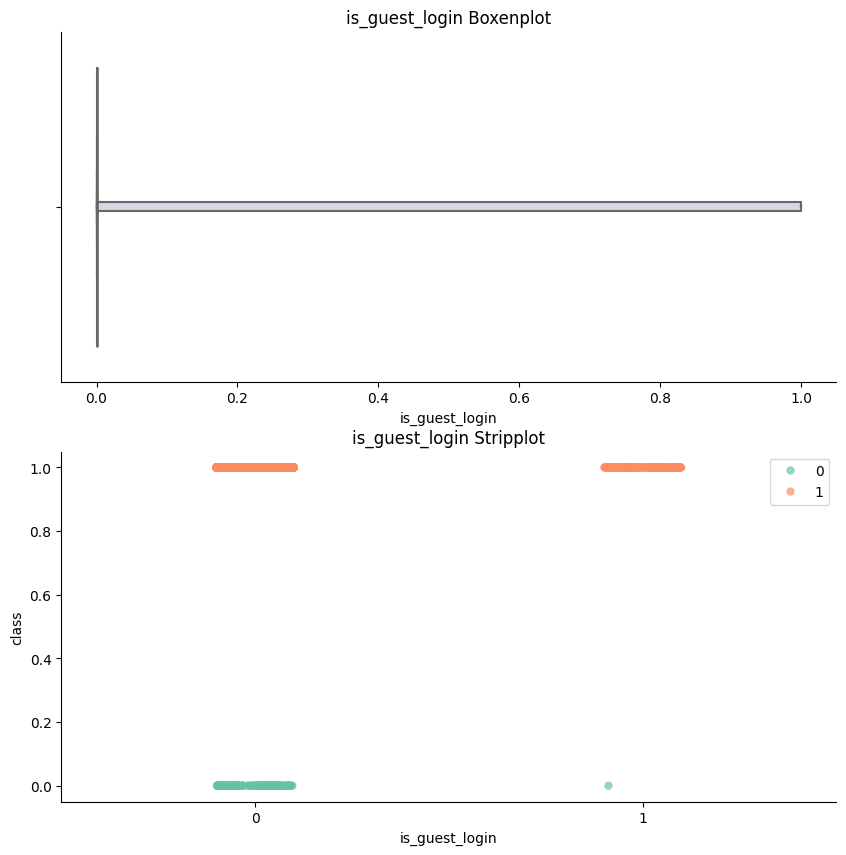

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


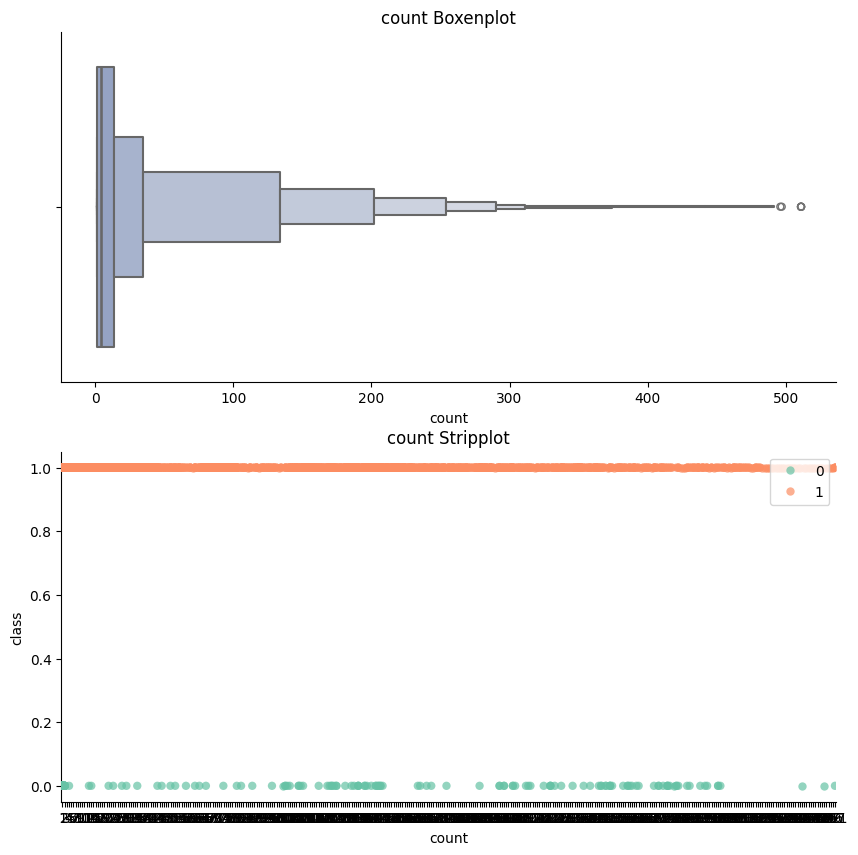

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


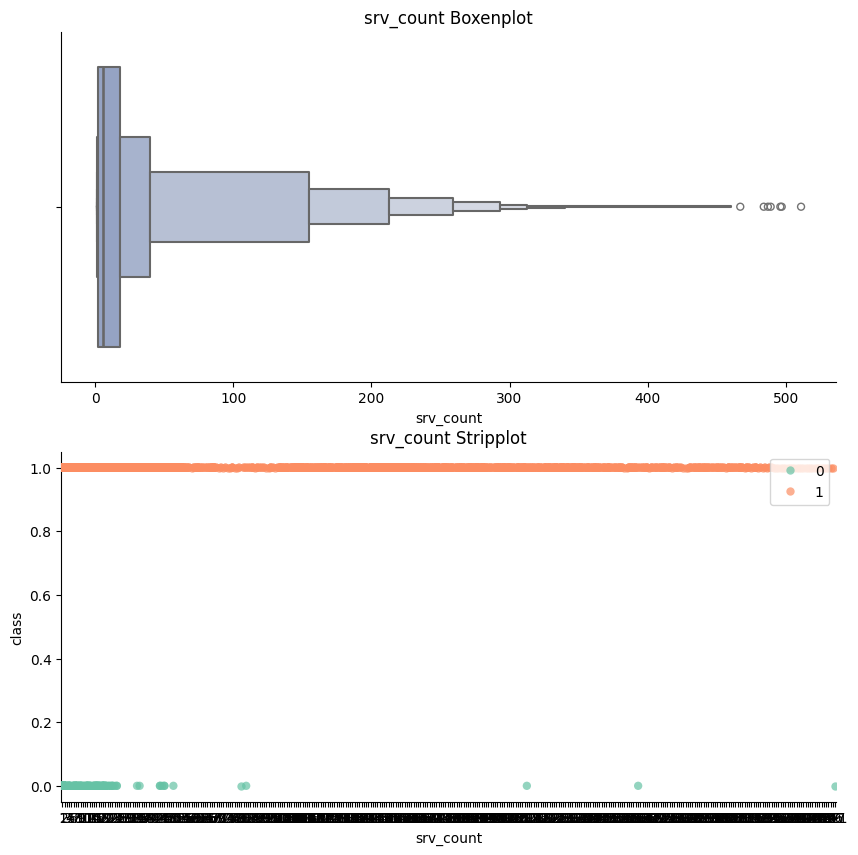

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


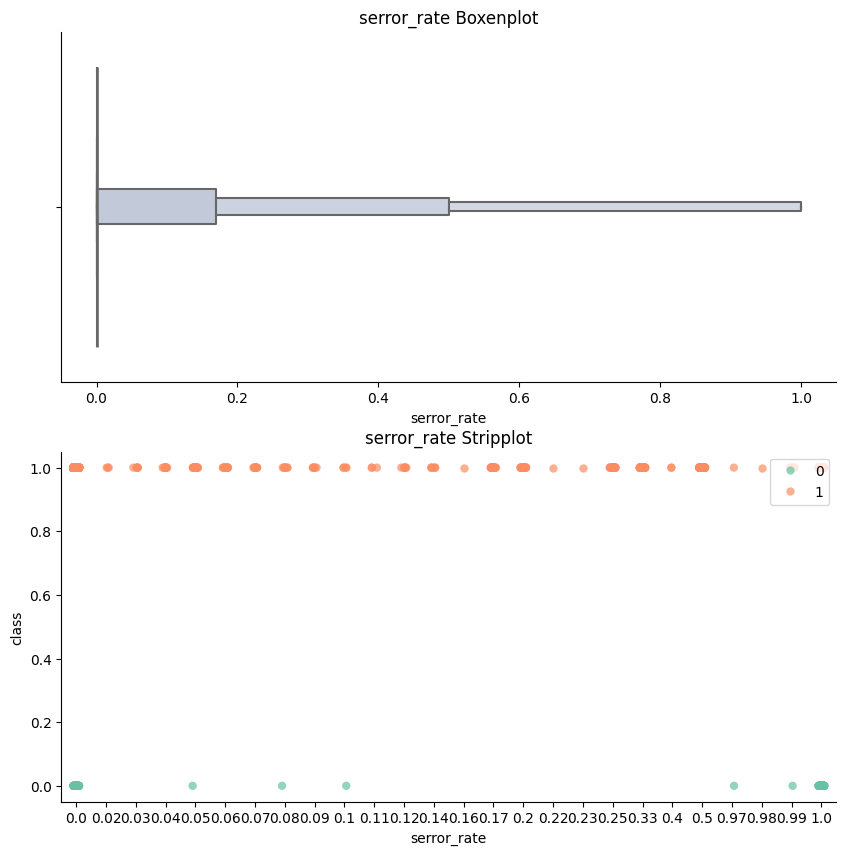

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


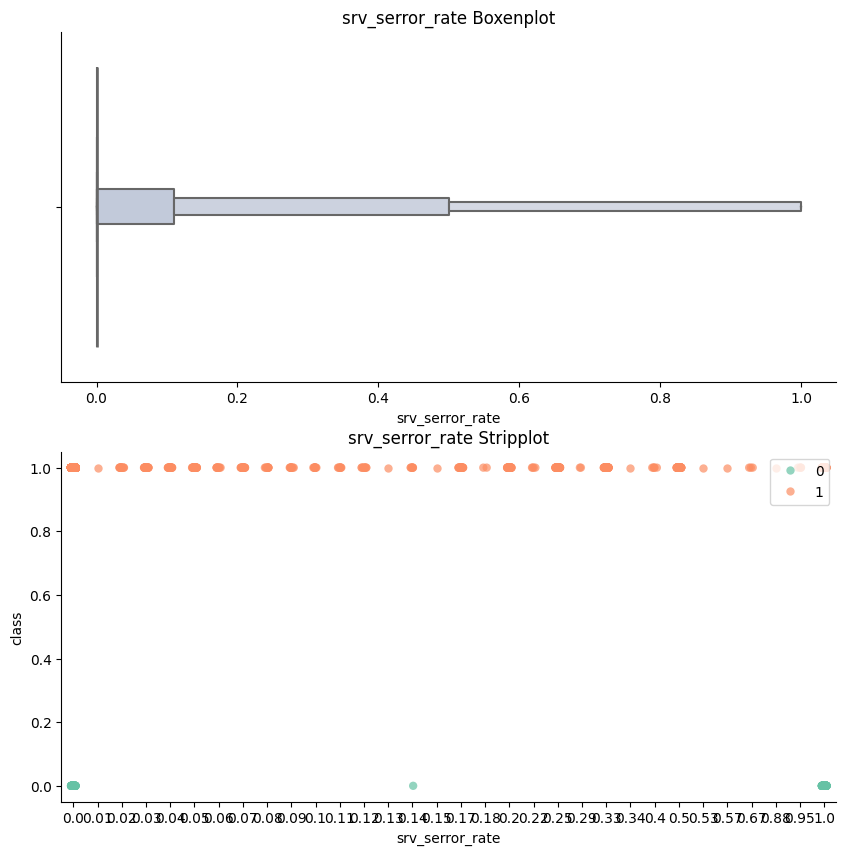

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


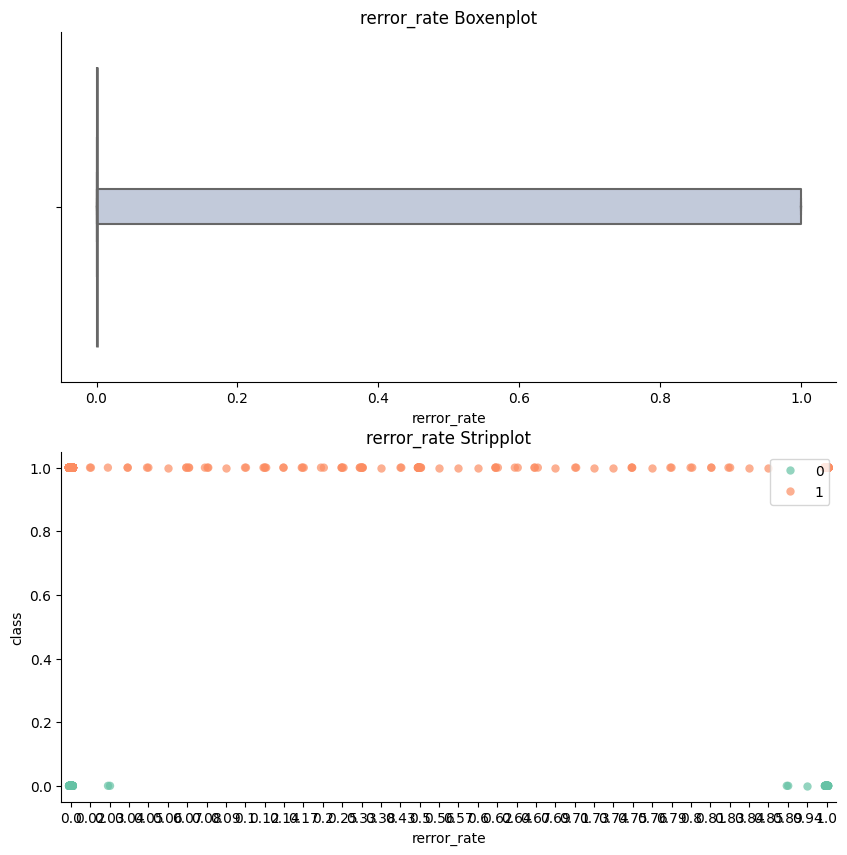

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


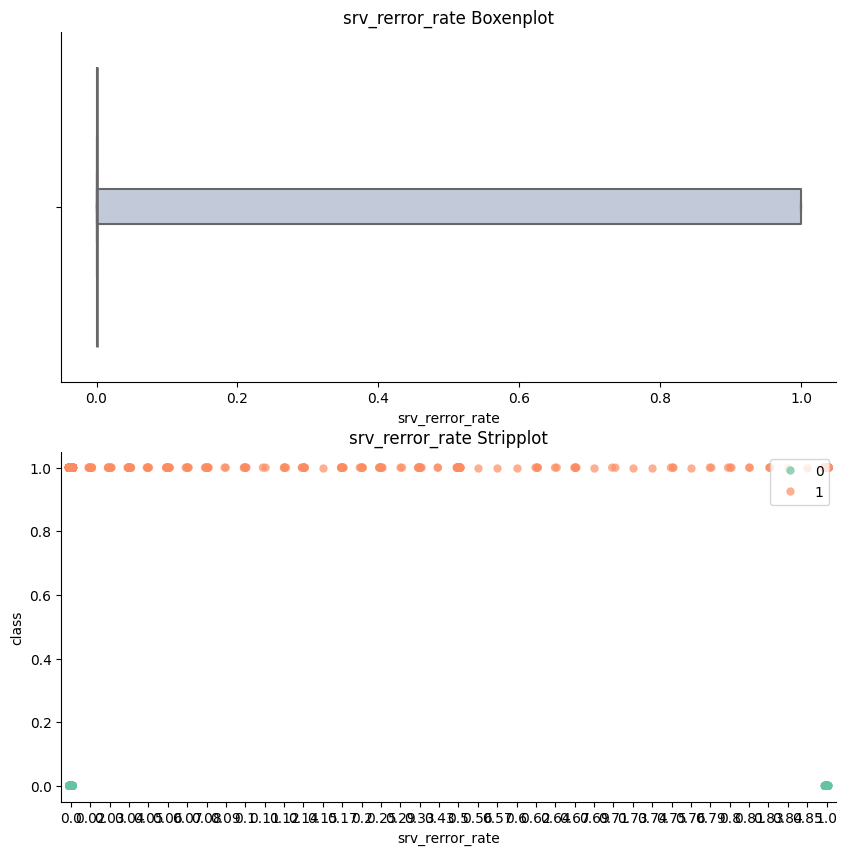

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


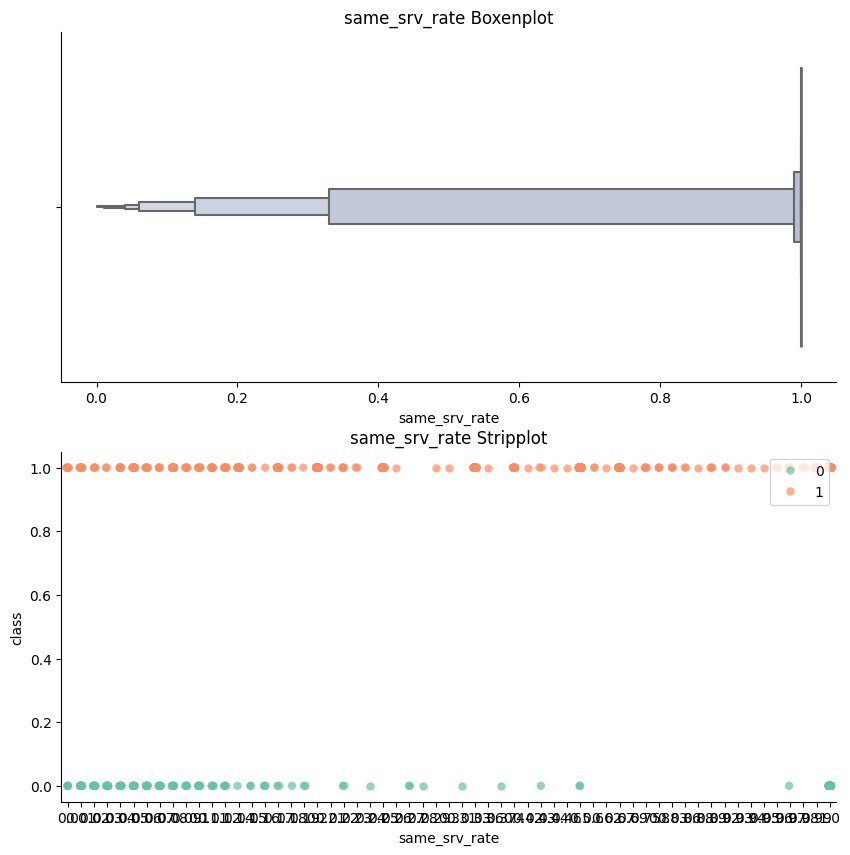

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


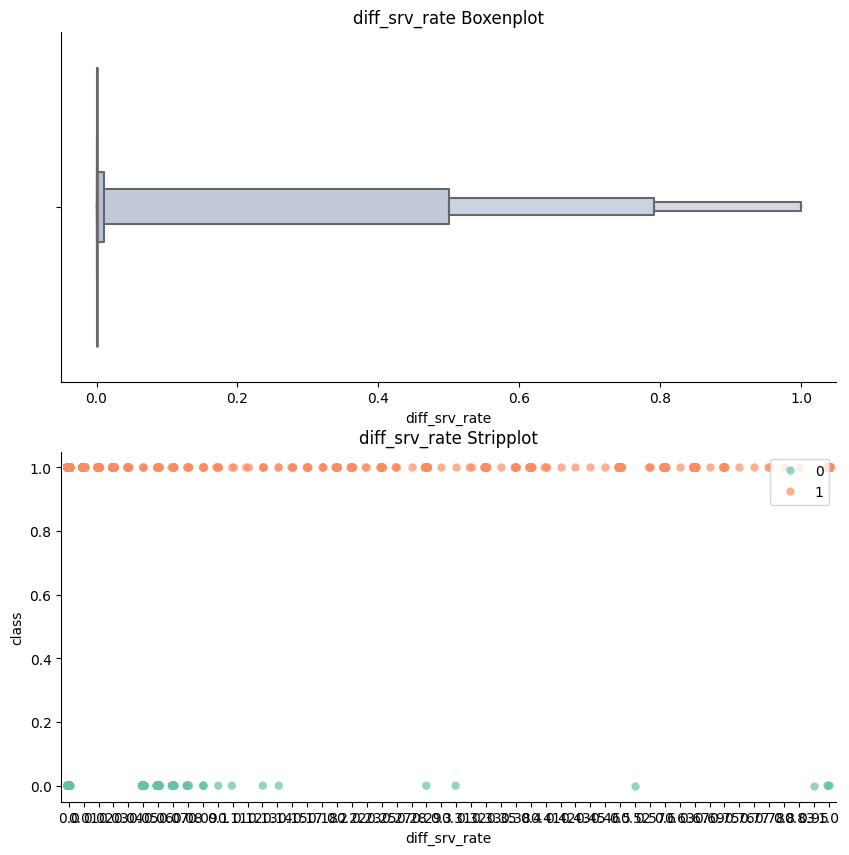

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


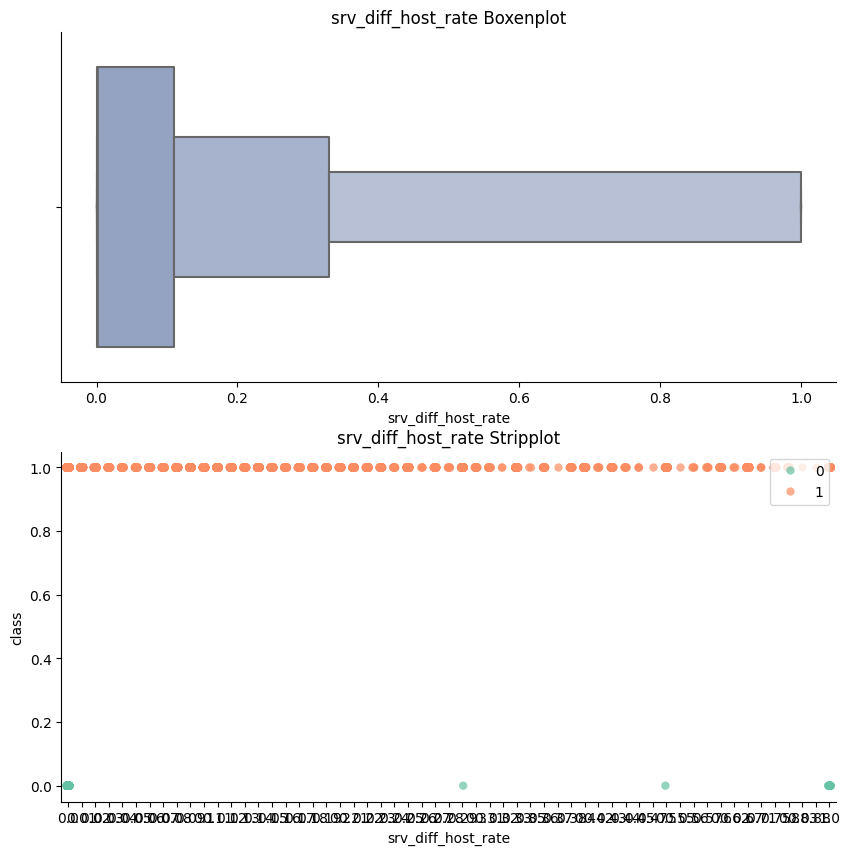

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


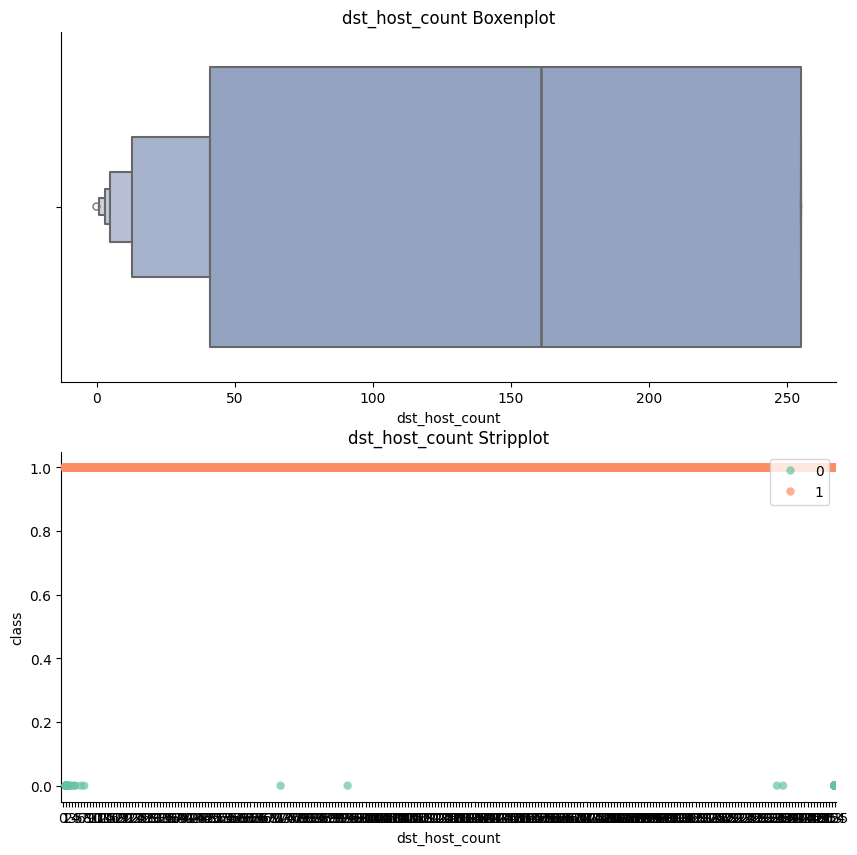

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


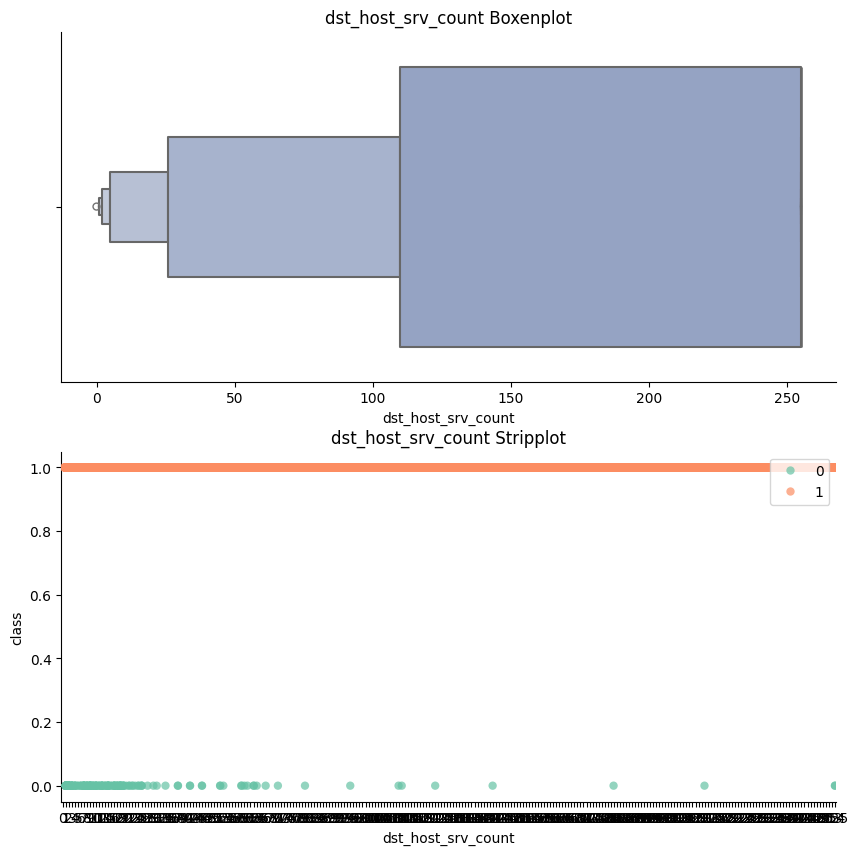

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


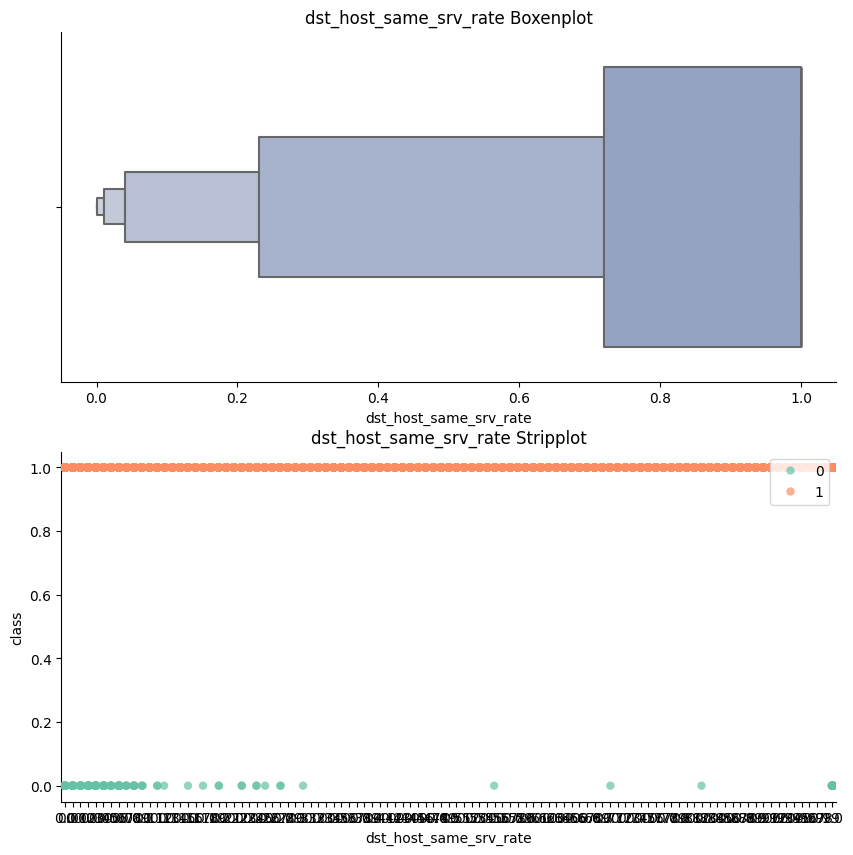

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


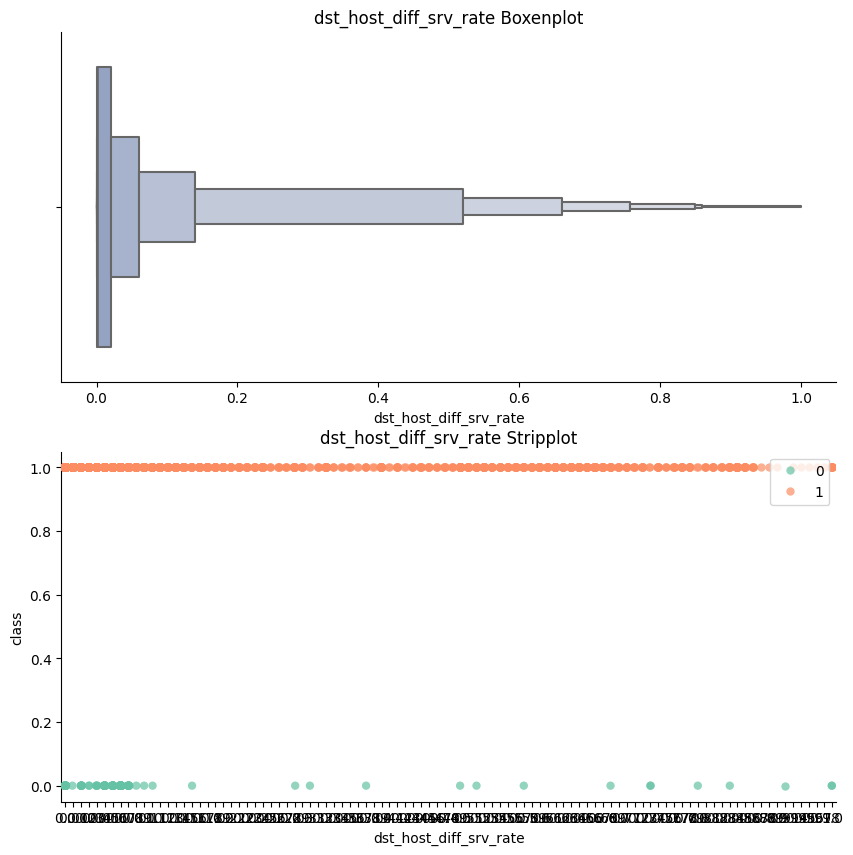

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


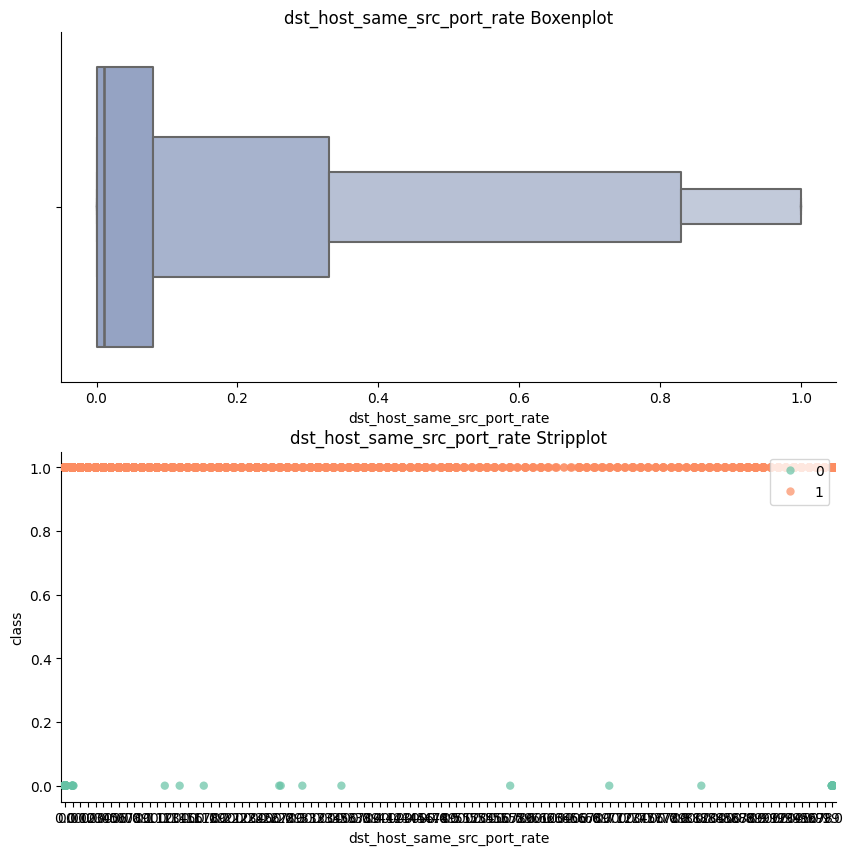

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


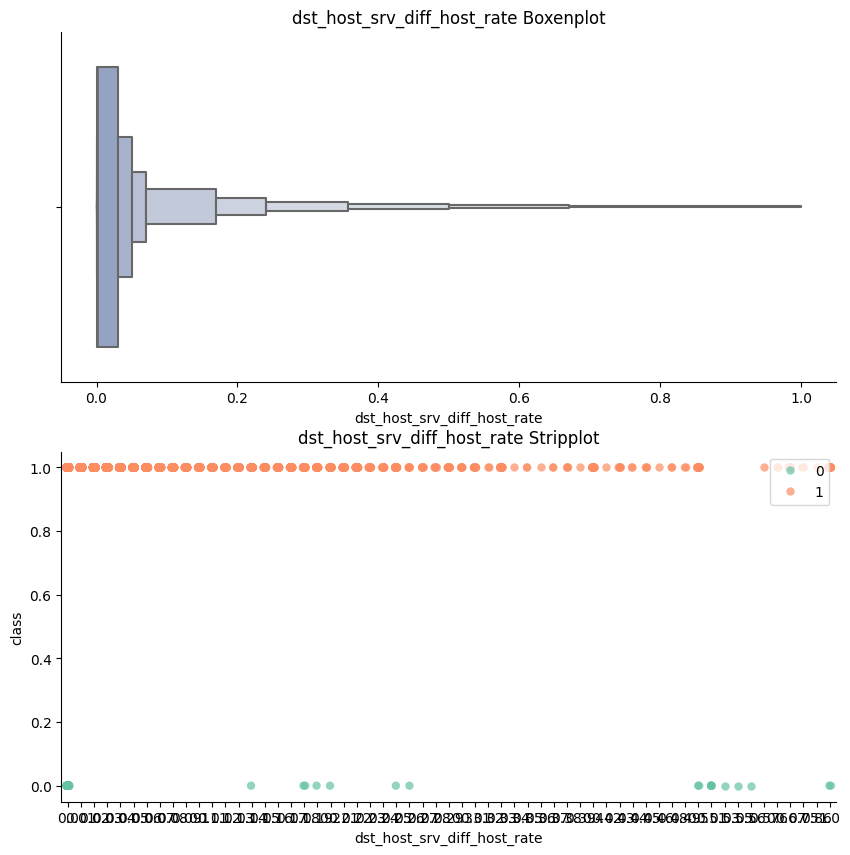

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


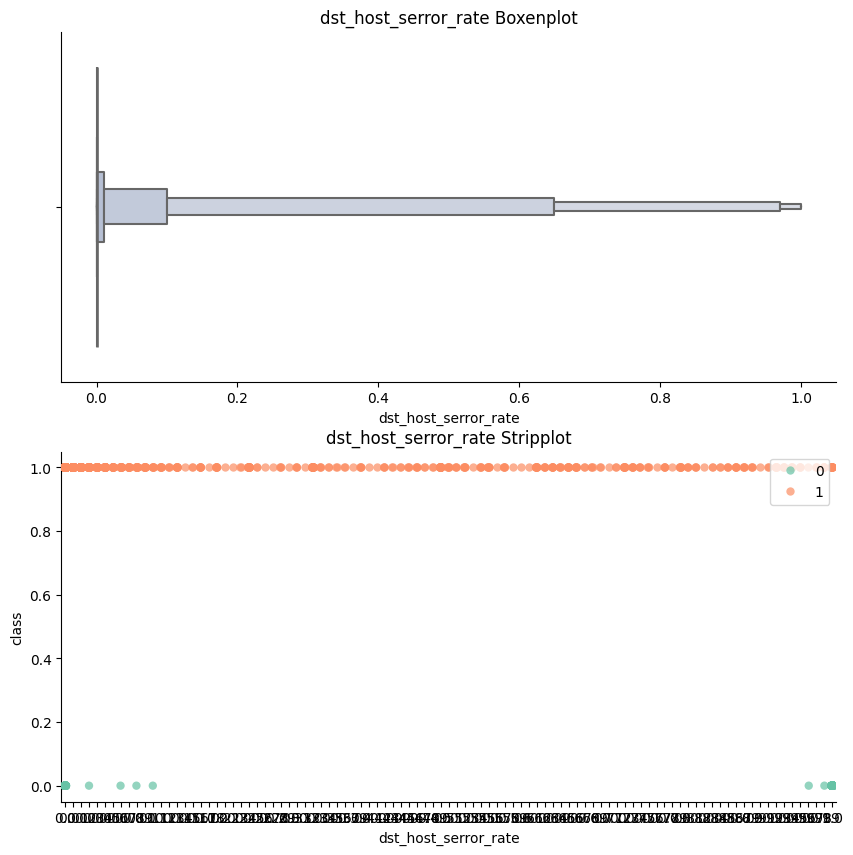

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


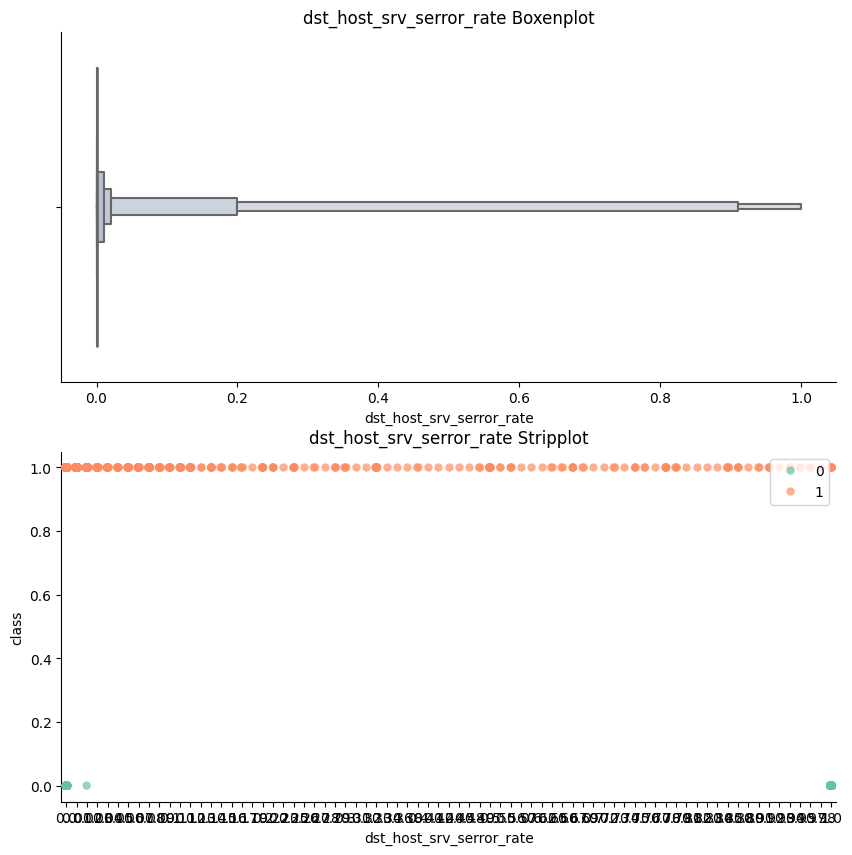

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


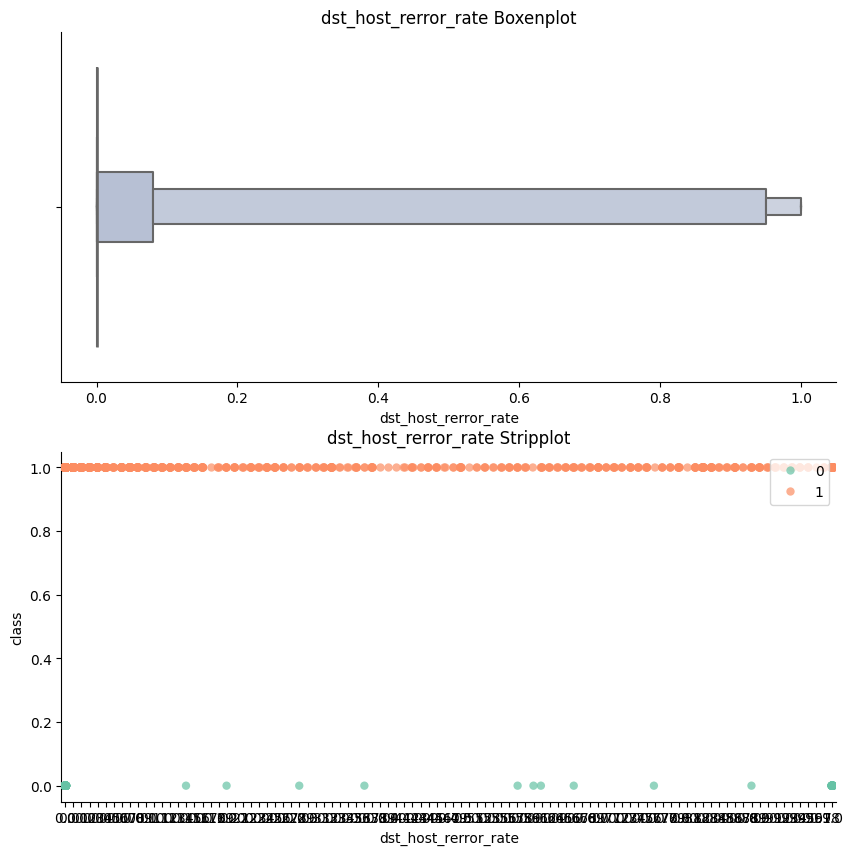

<ipython-input-12-b2c6214b21bf>:61: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


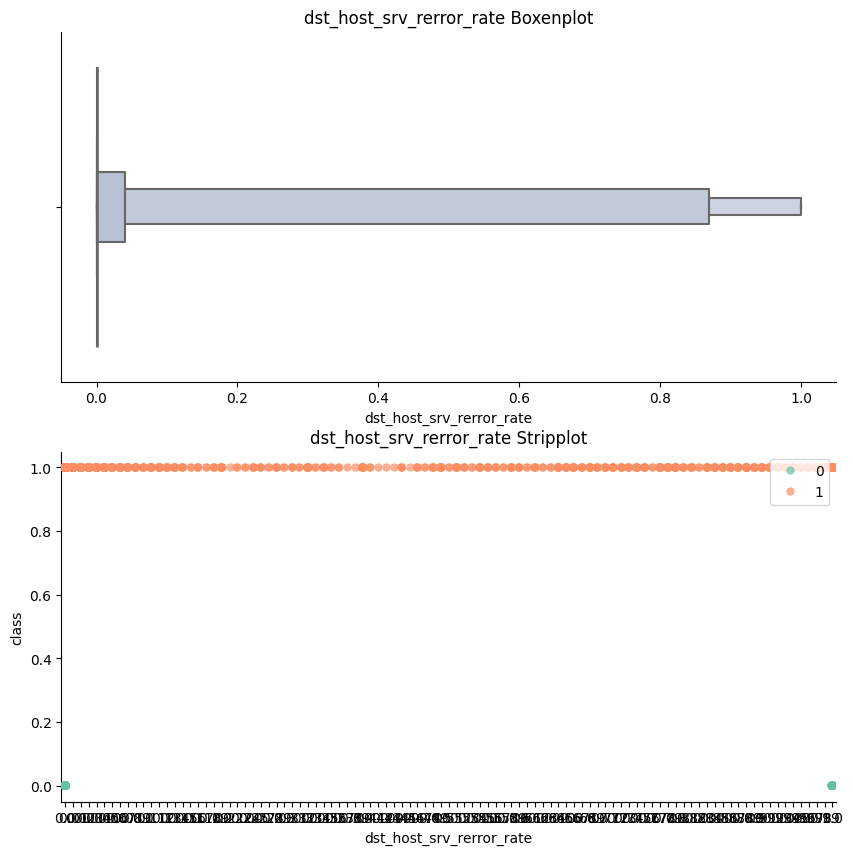

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

custom_palette = sns.color_palette("Set2")

# Assuming dfPhase is defined earlier

X = pd.get_dummies(dfPhase.drop(columns=['class']))
y = dfPhase['class']

y_binary = y.replace({'anomaly': 0, 'normal': 1})

X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# LightGBM model
lgb_model = lgb.LGBMClassifier(verbosity=-1)  # Setting verbosity to -1 suppresses warnings
lgb_model.fit(X_train, y_train_binary)

# XGBoost model
xgb_model = xgb.XGBClassifier(verbosity=0)  # Setting verbosity to 0 suppresses warnings
xgb_model.fit(X_train, y_train_binary)

# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lgb', lgb_model), ('xgb', xgb_model)], voting='soft')
ensemble_model.fit(X_train, y_train_binary)

# Predictions using ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate evaluation metrics
accuracy_ensemble = accuracy_score(y_test_binary, y_pred_ensemble)
precision_ensemble = precision_score(y_test_binary, y_pred_ensemble)
recall_ensemble = recall_score(y_test_binary, y_pred_ensemble)
f1_ensemble = f1_score(y_test_binary, y_pred_ensemble)

print("Ensemble Metrics:")
print("Accuracy:", accuracy_ensemble)
print("Precision:", precision_ensemble)
print("Recall:", recall_ensemble)
print("F1 Score:", f1_ensemble)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_ensemble))

# Plotting
for col in dfPhase.columns:
    if col != 'class' and pd.api.types.is_numeric_dtype(dfPhase[col]):
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        g1 = sns.boxenplot(x=dfPhase[col], ax=ax[0], color=custom_palette[2], linewidth=1.5)
        g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)
        ax[0].set_title(f"{col} Boxenplot")
        ax[0].set_xlabel(col)
        ax[1].set_title(f"{col} Stripplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("class")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        g2.legend(loc='upper right')
        plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming dfPhase is defined earlier

X = pd.get_dummies(dfPhase.drop(columns=['class']))
y = dfPhase['class']

y_binary = y.replace({'anomaly': 0, 'normal': 1})

X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_binary)

# Predictions using KNN model
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

print("KNN Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_binary, y_pred))

KNN Metrics:
Accuracy: 0.9974264705882353
Precision: 0.9988843436221644
Recall: 0.9985130111524163
F1 Score: 0.998698642870422
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      2720
   macro avg       0.93      0.95      0.94      2720
weighted avg       1.00      1.00      1.00      2720

